In [283]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sbn
import numpy as np
import requests
import random
import operator
import pickle
import networkx as nx
matplotlib.style.use('ggplot')

py.offline.init_notebook_mode()

In [4]:
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')
aisles.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [5]:
depts = pd.read_csv('/home/faculty/millbr02/pub/ecomm/departments.csv')
depts.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [119]:
ordersdf = pd.read_csv('/home/faculty/millbr02/pub/ecomm/orders.csv')
ordersdf.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [7]:
products = pd.read_csv('/home/faculty/millbr02/pub/ecomm/products.csv')
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [8]:
op = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__train.csv')
op.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [9]:
#op_prior = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__prior.csv')
#op_prior.head()

<h3> Some exploratory data analysis questions </h3>
<p> What is the most popular first item added to cart?

In [10]:
joined = op.merge(products, on='product_id')

In [11]:
joined.head()

order_id  product_id  add_to_cart_order  reordered      product_name  \
0         1       49302                  1          1  Bulgarian Yogurt   
1    816049       49302                  7          1  Bulgarian Yogurt   
2   1242203       49302                  1          1  Bulgarian Yogurt   
3   1383349       49302                 11          1  Bulgarian Yogurt   
4   1787378       49302                  8          0  Bulgarian Yogurt   

   aisle_id  department_id  
0       120             16  
1       120             16  
2       120             16  
3       120             16  
4       120             16

In [12]:
joined.groupby(['product_name'])['product_name'].count().sort_values(ascending=False)

product_name
Banana                                                                                18726
Bag of Organic Bananas                                                                15480
Organic Strawberries                                                                  10894
Organic Baby Spinach                                                                   9784
Large Lemon                                                                            8135
Organic Avocado                                                                        7409
Organic Hass Avocado                                                                   7293
Strawberries                                                                           6494
Limes                                                                                  6033
Organic Raspberries                                                                    5546
Organic Blueberries                                                

In [13]:
joined[joined.product_id==24852].head()

order_id  product_id  add_to_cart_order  reordered product_name  \
129688       226       24852                  2          0       Banana   
129689       473       24852                  2          0       Banana   
129690       878       24852                  2          1       Banana   
129691      1042       24852                  1          1       Banana   
129692      1139       24852                  1          1       Banana   

        aisle_id  department_id  
129688        24              4  
129689        24              4  
129690        24              4  
129691        24              4  
129692        24              4

<p> Look at average size of each order </p>

In [108]:
aco = op.groupby('order_id')['add_to_cart_order'].max()
aco = pd.DataFrame(aco)
aco = aco.reset_index()
aco.head(10)

order_id  add_to_cart_order
0         1                  8
1        36                  8
2        38                  9
3        96                  7
4        98                 49
5       112                 11
6       170                 17
7       218                  5
8       226                 13
9       349                 11

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f4e9446d400>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f4e9446dcf8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f4e9446d828>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f4e9446d358>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f4e9446da90>}

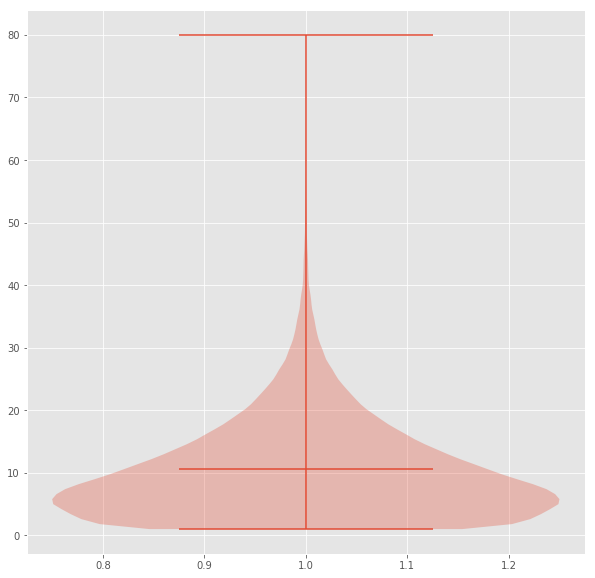

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

axes.violinplot(aco['add_to_cart_order'], showmeans=True, showmedians=False)

In [16]:
aco = op.groupby('order_id')

In [17]:
aco.get_group(36)['product_id']

8     39612
9     19660
10    49235
11    43086
12    46620
13    34497
14    48679
15    46979
Name: product_id, dtype: int64

In [18]:
op.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [19]:
pivot = pd.pivot_table(op[op.order_id<50], index='order_id', columns='product_id', values='add_to_cart_order')

In [20]:
pivot

product_id  4461   10246  11109  11913  13176  18159  19660  21616  22035  \
order_id                                                                    
1             NaN    3.0    2.0    NaN    6.0    NaN    NaN    NaN    8.0   
36            NaN    NaN    NaN    NaN    NaN    NaN    2.0    NaN    NaN   
38            3.0    NaN    NaN    1.0    NaN    2.0    NaN    4.0    NaN   

product_id  23622  ...    42625  43086  43633  46620  46979  47209  48679  \
order_id           ...                                                      
1             NaN  ...      NaN    NaN    5.0    NaN    NaN    7.0    NaN   
36            NaN  ...      NaN    4.0    NaN    5.0    8.0    NaN    7.0   
38            5.0  ...      8.0    NaN    NaN    NaN    NaN    NaN    NaN   

product_id  49235  49302  49683  
order_id                         
1             NaN    1.0    4.0  
36            3.0    NaN    NaN  
38            NaN    NaN    NaN  

[3 rows x 25 columns]

In [21]:
pivot.iloc[1][pivot.iloc[1].notnull()]

product_id
19660    2.0
34497    6.0
39612    1.0
43086    4.0
46620    5.0
46979    8.0
48679    7.0
49235    3.0
Name: 36, dtype: float64

<h3> Constructing the matrix for what products are ordered with other products </h3>

In [22]:
op.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [23]:
mat = {}
orders = {}

for index, row in op.iterrows():    
    if row[1] not in mat:
        mat[row[1]] = {}
    if row[0] not in orders:
        orders[row[0]] = []
    orders[row[0]].append(row[1])
    

In [24]:
for order in orders.values():
    for i in order:
        for j in order:
            if i != j:
                if j not in mat[i]:
                    mat[i][j] = 1
                else:
                    mat[i][j] += 1      

In [25]:
# matrix entry for bananas (product id 24852), the most popular item

mat[24852]

{1: 3,
 2: 1,
 4: 2,
 8: 3,
 9: 1,
 10: 18,
 11: 2,
 12: 1,
 18: 1,
 23: 14,
 25: 21,
 28: 6,
 29: 1,
 30: 3,
 31: 1,
 32: 2,
 34: 54,
 35: 1,
 36: 4,
 37: 9,
 40: 1,
 42: 1,
 44: 1,
 45: 198,
 46: 3,
 47: 2,
 49: 18,
 53: 1,
 54: 11,
 57: 1,
 58: 3,
 59: 1,
 62: 1,
 63: 9,
 65: 1,
 66: 2,
 67: 1,
 68: 4,
 72: 1,
 74: 1,
 75: 2,
 77: 1,
 79: 16,
 81: 1,
 82: 1,
 83: 6,
 84: 3,
 86: 1,
 87: 1,
 91: 1,
 93: 10,
 94: 4,
 95: 13,
 96: 1,
 99: 3,
 100: 5,
 101: 3,
 102: 1,
 104: 1,
 106: 3,
 107: 1,
 115: 3,
 116: 8,
 117: 22,
 118: 2,
 121: 11,
 122: 1,
 123: 3,
 126: 1,
 127: 6,
 128: 3,
 130: 3,
 131: 3,
 132: 1,
 137: 3,
 138: 1,
 141: 31,
 145: 1,
 148: 26,
 149: 1,
 150: 1,
 156: 3,
 158: 1,
 160: 20,
 162: 42,
 165: 16,
 168: 1,
 169: 22,
 174: 1,
 176: 1,
 177: 1,
 179: 1,
 181: 4,
 184: 5,
 186: 11,
 187: 4,
 188: 2,
 193: 1,
 196: 65,
 199: 2,
 204: 33,
 205: 1,
 206: 6,
 207: 3,
 209: 1,
 210: 29,
 212: 1,
 215: 1,
 216: 4,
 217: 5,
 219: 4,
 222: 8,
 226: 12,
 228: 10,
 232: 1,


<h3> Predictions </h3>

In [313]:
# only build matrix from training set, then use that to get the test set

In [124]:
msk = np.random.rand(len(op)) < 0.8
training = op[msk]
test = op[~msk]

In [129]:
training.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
4         1       43633                  5          1
5         1       13176                  6          0

In [130]:
test.head()

order_id  product_id  add_to_cart_order  reordered
3          1       49683                  4          0
6          1       47209                  7          0
7          1       22035                  8          1
9         36       19660                  2          1
10        36       49235                  3          0

In [314]:
def top_matches(product):
    return dict(sorted(mat[product].items(), key=getval, reverse=True)[:5])       

In [315]:
recommended = top_matches(15200)

In [316]:
products[products.product_id == 15200]

product_id         product_name  aisle_id  department_id
15199       15200  Organic Green Beans        83              4

In [317]:
recommended

{13176: 85, 21137: 80, 21903: 57, 24852: 41, 39275: 35}

In [163]:
print(products[products.product_id == 13176])
print(products[products.product_id == 21137])
print(products[products.product_id == 21903])
print(products[products.product_id == 24582])
print(products[products.product_id == 39275])

       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
       product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4
       product_id          product_name  aisle_id  department_id
21902       21903  Organic Baby Spinach       123              4
       product_id                       product_name  aisle_id  department_id
24581       24582  Toaster Size Premium Plain Bagels        93              3
       product_id         product_name  aisle_id  department_id
39274       39275  Organic Blueberries       123              4


<p> If you buy green beens, your top 5 recommendations are a bag of organic bananas, organic strawberries, and organic baby spinach, toaster size premium plain bagels, and organic blueberries.

In [164]:
def predictor(mat, item1, item2):
    recs = list(mat[item1].items()) + list(mat[item2].items())
    recs = sorted(recs, key=getval, reverse=True)
    recs = [recs[x][0] for x in range(min(5,len(recs)))]
    recs = list(set(recs))
    return recs

In [167]:
def getval(d):
    return d[1]

In [178]:
predictor(mat, 15200, 22465)

[13176, 21137, 39275, 24852, 21903]

In [236]:
print(products[products.product_id == 13176])
print(products[products.product_id == 21137])
print(products[products.product_id == 39275])
print(products[products.product_id == 24582])
print(products[products.product_id == 21903])

       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
       product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4
       product_id         product_name  aisle_id  department_id
39274       39275  Organic Blueberries       123              4
       product_id                       product_name  aisle_id  department_id
24581       24582  Toaster Size Premium Plain Bagels        93              3
       product_id          product_name  aisle_id  department_id
21902       21903  Organic Baby Spinach       123              4


In [232]:
tco = test.groupby('order_id')

In [233]:
hits = 0
count = 0
for order in tco.groups.keys():
    contents = list(tco.get_group(order).sort_values('add_to_cart_order').product_id)
    if len(contents) > 2:
        count += 1
        recs = predictor(mat, contents[0], contents[1])
        basket = set(contents[3:])
        recs = set(recs)
        correct_recs = recs.intersection(basket)
        if len(correct_recs) >= 1:
            hits +=1
                        
print(hits, count, hits/count)

1868 43617 0.0428273379645551


<h3> Look at flow from aisle to aisle </h3>

In [302]:
op.head()

order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1

In [41]:
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [310]:
op_aisles = op.merge(products, on='product_id')

In [311]:
op_aisles.head()

order_id  product_id  add_to_cart_order  reordered      product_name  \
0         1       49302                  1          1  Bulgarian Yogurt   
1    816049       49302                  7          1  Bulgarian Yogurt   
2   1242203       49302                  1          1  Bulgarian Yogurt   
3   1383349       49302                 11          1  Bulgarian Yogurt   
4   1787378       49302                  8          0  Bulgarian Yogurt   

   aisle_id  department_id  
0       120             16  
1       120             16  
2       120             16  
3       120             16  
4       120             16

In [269]:
aisles_sorted = op_aisles.sort_values(['order_id', 'add_to_cart_order'], ascending = ['True', 'True'])
aisles_sorted.head()

order_id  product_id  add_to_cart_order  reordered  \
0          1.0       49302                1.0        1.0   
8          1.0       11109                2.0        1.0   
152        1.0       10246                3.0        0.0   
1214       1.0       49683                4.0        0.0   
3627       1.0       43633                5.0        1.0   

                                       product_name  aisle_id  department_id  
0                                  Bulgarian Yogurt       120             16  
8     Organic 4% Milk Fat Whole Milk Cottage Cheese       108             16  
152                           Organic Celery Hearts        83              4  
1214                                 Cucumber Kirby        83              4  
3627           Lightly Smoked Sardines in Olive Oil        95             15

In [212]:
aisles_flow = {}

In [213]:
# aisles_flow looks like aisles_flow[from_aisle] = {to_aisle: number of times}
# aisles go from 1 to 134

for i in range(1, 135):
    aisles_flow[i] = {}
    
for i in range(1, 135):
    for j in range(1, 135):
        aisles_flow[i][j] = 0

In [219]:
aisles_flow[17][92]

0

In [274]:
from_aisle = 0
old_order_id = 0
for i, x in aisles_sorted.iterrows():
    new_order_id = x.order_id
    to_aisle = x.aisle_id
    if from_aisle != 0 and new_order_id == old_order_id:
        if from_aisle in aisles_flow:
            if to_aisle in aisles_flow[from_aisle]:
                aisles_flow[from_aisle][to_aisle] += 1
            else:
                aisles_flow[from_aisle][to_aisle] = 1
        else:
            aisles_flow[from_aisle] = {}
            aisles_flow[from_aisle][to_aisle] = 1
    old_order_id = x.order_id
    from_aisle = x.aisle_id

In [319]:
aisles_flow[24]

{1: 271,
 2: 334,
 3: 1307,
 4: 570,
 5: 135,
 6: 148,
 7: 112,
 8: 138,
 9: 555,
 10: 30,
 11: 48,
 12: 122,
 13: 403,
 14: 425,
 15: 107,
 16: 2042,
 17: 739,
 18: 89,
 19: 800,
 20: 140,
 21: 3672,
 22: 50,
 23: 596,
 24: 31994,
 25: 176,
 26: 611,
 27: 43,
 28: 40,
 29: 194,
 30: 214,
 31: 2266,
 32: 2604,
 33: 39,
 34: 235,
 35: 566,
 36: 806,
 37: 1407,
 38: 1079,
 39: 144,
 40: 83,
 41: 97,
 42: 343,
 43: 364,
 44: 16,
 45: 807,
 46: 39,
 47: 124,
 48: 176,
 49: 510,
 50: 691,
 51: 340,
 52: 827,
 53: 1177,
 54: 670,
 55: 38,
 56: 62,
 57: 364,
 58: 115,
 59: 834,
 60: 76,
 61: 657,
 62: 46,
 63: 460,
 64: 242,
 65: 113,
 66: 437,
 67: 1537,
 68: 69,
 69: 813,
 70: 68,
 71: 112,
 72: 562,
 73: 23,
 74: 214,
 75: 203,
 76: 50,
 77: 923,
 78: 1502,
 79: 538,
 80: 34,
 81: 718,
 82: 21,
 83: 19501,
 84: 3846,
 85: 136,
 86: 2538,
 87: 32,
 88: 1071,
 89: 239,
 90: 55,
 91: 3066,
 92: 876,
 93: 917,
 94: 635,
 95: 215,
 96: 1560,
 97: 48,
 98: 1350,
 99: 395,
 100: 749,
 101: 44,
 1

In [276]:
aislesdf = pd.DataFrame(aisles_flow)

In [279]:
aislesdf.head()

1    2     3     4    5    6    7    8    9    10  ...   125  126  127  \
1  202    5    35    22    7    7    4    7   16    0 ...     2    2    1   
2   13  145    24    22    6    3    9    3   46    2 ...     3    0    2   
3   27   21  4801    91   15   17    8   13   82    0 ...    50   11   12   
4   18   29    85  1255   45   11   18   12  125    4 ...    10    7   14   
5    7   13    22    45   98    5    6    2   44    2 ...     0    0    2   

   128  129  130  131  132  133  134  
1   17   22   17   13    0    1    0  
2   31   25    9   59    1    2    2  
3   46   73   82   60    1    5    0  
4   58  116   49  139    1    9    1  
5   28   34   10   26    0    2    0  

[5 rows x 134 columns]

In [280]:
aislesdf.tail()

1    2    3    4    5    6    7    8    9    10  ...   125  126  127  \
130   10   16   85   65   10    7    5   10   47    5 ...     3    6    6   
131   17   50   74  182   40    9   18   10  664    1 ...     7    3    6   
132    0    0    1    0    0    2    0    0    2    0 ...     1    6    7   
133    1    1   10    5    1    7    0    0    4    1 ...     0    5    7   
134    0    0    2    1    0    7    0    0    2    0 ...     0    0    0   

     128  129  130   131  132  133  134  
130   44   26  370    63    1    5    0  
131   79   91   64  1153    0    3    1  
132    1    0    1     6   10    1    0  
133    1    1    5     5    0   37    0  
134    0    2    1     3    0    0   45  

[5 rows x 134 columns]

<h3> Visualizations of aisles flow </h3>

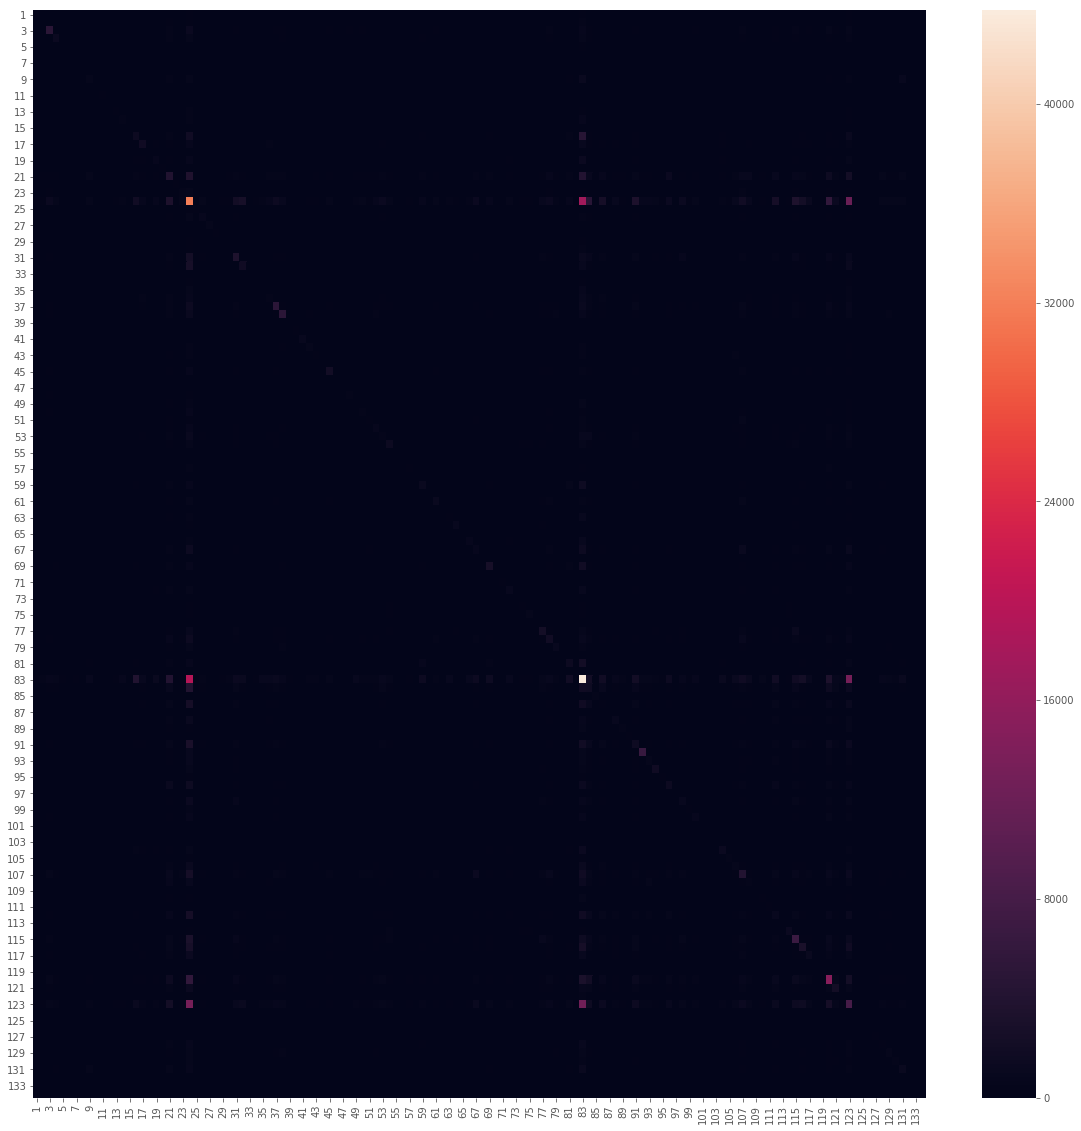

In [281]:
fig, ax = plt.subplots(figsize=(20,20))
sbn.heatmap(aislesdf, ax=ax)

In [298]:
g = nx.Graph()

for from_aisle in aisles_flow:
    for to_aisle in aisles_flow[from_aisle]:
        if aisles_flow[from_aisle][to_aisle] > 50:
            g.add_edge(from_aisle, to_aisle)

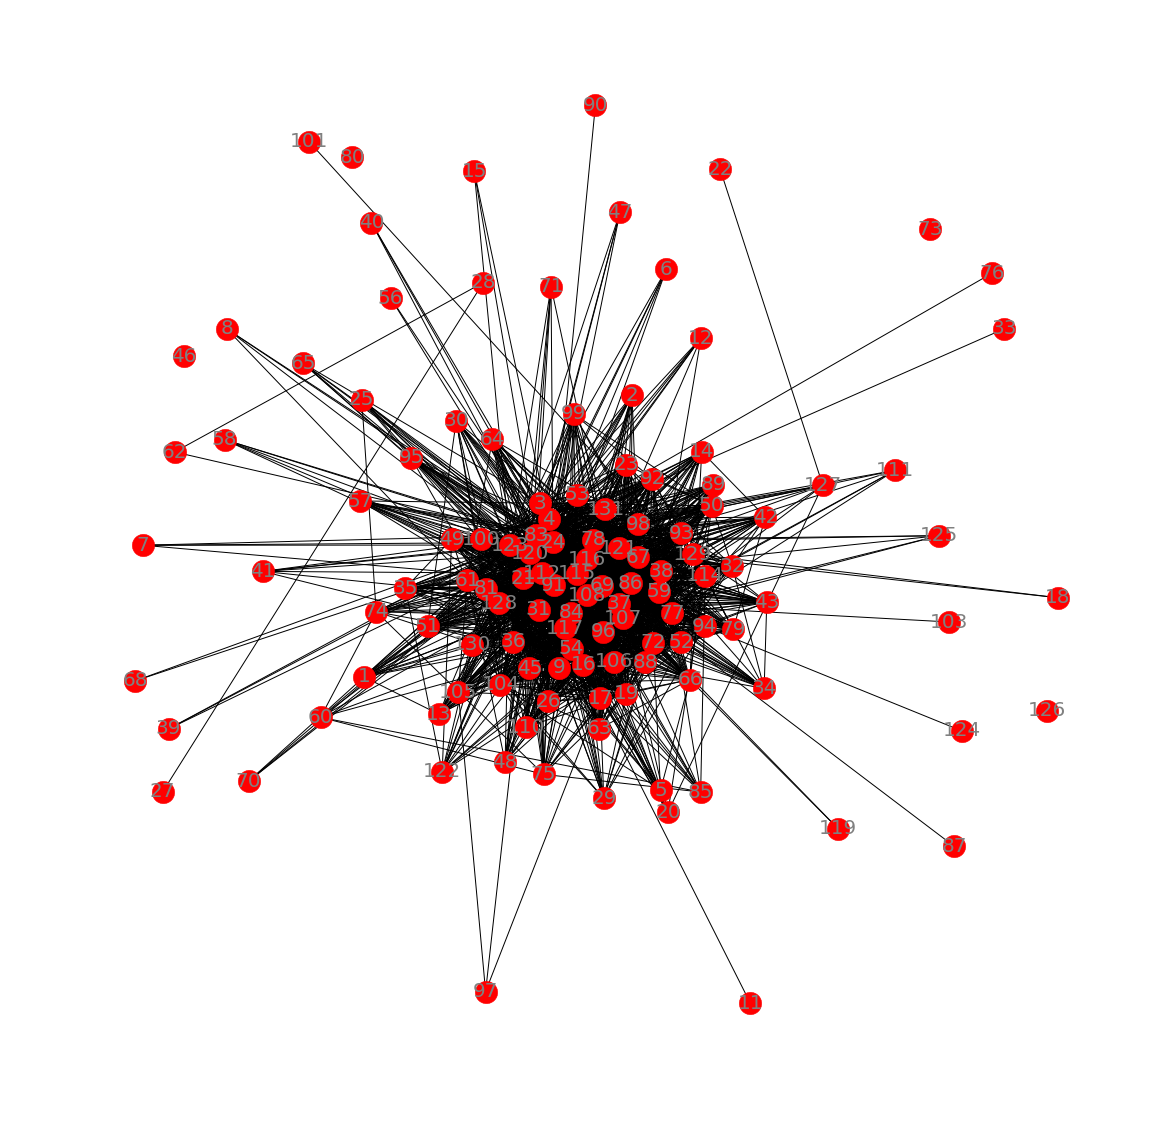

In [301]:
gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g, k=0.4, iterations=20)
nx.draw(g, pos, ax=gax, node_size=500, with_labels=True, font_size=20, font_color='gray')

plt.show()

<p> Convert aisles dictionary into a list of lists so D3 can make use of it

In [335]:
aisles_matrix = []

for key, value in aisles_flow.items():
    value_list = []
    for key2, value2 in value.items():
        value_list.append(value2)
    aisles_matrix.append(value_list)

In [369]:
def print_mat(mat):
    print('[')
    icount = 0
    for i in mat:
        icount += 1
        print('[', end='')
        jcount = 0
        for j in i:
            jcount += 1
            j = str(j)
            j = j.strip('\n')
            if jcount < 134:
                print(j + ', ', end = '')
            elif jcount == 134 and icount < 134:
                print(j + '],')
            else:
                print(j + ']')
    print(']')

In [370]:
print_mat(aisles_matrix)

[
[202, 13, 27, 18, 7, 2, 4, 4, 21, 1, 0, 6, 56, 7, 5, 15, 10, 1, 15, 3, 85, 0, 17, 228, 2, 21, 6, 1, 6, 2, 56, 29, 1, 7, 8, 13, 54, 46, 4, 0, 3, 5, 8, 0, 30, 2, 5, 3, 11, 10, 10, 17, 18, 25, 0, 0, 7, 3, 32, 2, 14, 2, 2, 3, 4, 13, 49, 0, 80, 1, 8, 13, 1, 5, 4, 0, 28, 65, 17, 0, 13, 0, 180, 62, 3, 35, 3, 19, 16, 1, 42, 13, 22, 20, 11, 54, 2, 30, 5, 36, 2, 0, 0, 5, 9, 28, 50, 23, 2, 16, 1, 59, 0, 2, 48, 38, 20, 2, 1, 73, 18, 10, 175, 2, 0, 0, 1, 15, 34, 10, 17, 0, 1, 0],
[5, 145, 21, 29, 13, 4, 8, 0, 37, 0, 0, 11, 22, 10, 3, 76, 26, 0, 33, 4, 285, 3, 12, 299, 3, 15, 5, 2, 6, 10, 46, 23, 5, 7, 15, 38, 38, 30, 4, 2, 4, 6, 23, 0, 21, 1, 5, 1, 14, 13, 15, 16, 40, 19, 2, 0, 6, 9, 40, 2, 17, 4, 14, 4, 2, 17, 54, 1, 27, 2, 1, 27, 1, 8, 5, 6, 20, 159, 16, 3, 30, 0, 394, 77, 1, 51, 1, 35, 13, 4, 43, 19, 17, 13, 8, 112, 2, 26, 8, 14, 2, 3, 1, 16, 10, 39, 77, 53, 2, 21, 3, 88, 0, 8, 66, 38, 42, 0, 1, 83, 37, 10, 204, 3, 2, 2, 0, 22, 26, 16, 50, 0, 1, 0],
[35, 24, 4801, 85, 22, 15, 10, 8, 77, 0, 11,

[1, 2, 9, 8, 4, 4, 0, 0, 7, 2, 3, 1, 6, 1, 0, 4, 11, 0, 10, 50, 16, 264, 8, 37, 22, 6, 0, 1, 2, 2, 16, 2, 1, 2, 1, 4, 25, 10, 1, 3, 6, 7, 1, 4, 7, 3, 4, 2, 5, 3, 1, 7, 6, 34, 11, 3, 2, 0, 9, 2, 13, 0, 4, 2, 1, 2, 5, 0, 5, 7, 2, 5, 11, 24, 20, 0, 8, 20, 9, 20, 6, 0, 45, 24, 6, 14, 3, 17, 2, 1, 16, 7, 6, 6, 2, 6, 0, 12, 4, 7, 12, 6, 0, 6, 2, 8, 19, 11, 13, 4, 1, 12, 1, 13, 30, 13, 8, 5, 2, 32, 9, 0, 37, 0, 1, 6, 53, 5, 3, 5, 7, 2, 4, 0],
[14, 16, 162, 52, 16, 8, 5, 11, 37, 2, 3, 4, 12, 12, 3, 19, 43, 4, 31, 11, 163, 4, 504, 529, 6, 33, 2, 2, 9, 11, 84, 54, 6, 16, 12, 51, 119, 80, 4, 9, 7, 19, 19, 4, 136, 13, 13, 28, 16, 110, 22, 53, 46, 65, 3, 2, 18, 11, 28, 6, 130, 3, 22, 31, 15, 28, 81, 0, 44, 2, 8, 39, 1, 17, 21, 4, 105, 203, 48, 3, 24, 3, 276, 84, 17, 56, 2, 74, 29, 4, 93, 44, 46, 24, 9, 86, 2, 65, 22, 31, 6, 4, 5, 25, 26, 65, 381, 54, 1, 20, 12, 111, 1, 22, 186, 70, 125, 0, 6, 204, 80, 8, 291, 3, 46, 4, 9, 30, 48, 29, 40, 1, 5, 1],
[271, 334, 1307, 570, 135, 148, 112, 138, 555, 30, 

[0, 2, 4, 5, 2, 1, 0, 0, 3, 0, 5, 0, 0, 0, 0, 1, 8, 0, 5, 12, 9, 6, 3, 21, 1, 5, 0, 0, 0, 1, 5, 2, 0, 3, 0, 0, 12, 3, 0, 0, 6, 0, 3, 27, 2, 2, 5, 1, 2, 3, 1, 4, 5, 28, 4, 5, 0, 0, 0, 6, 2, 1, 1, 3, 0, 0, 4, 0, 6, 4, 1, 6, 7, 10, 11, 1, 6, 6, 3, 7, 2, 0, 12, 9, 6, 7, 3, 2, 2, 0, 4, 6, 4, 2, 2, 5, 0, 1, 2, 3, 0, 0, 0, 1, 1, 8, 4, 0, 1, 2, 0, 4, 0, 10, 16, 2, 3, 5, 0, 6, 5, 1, 8, 1, 0, 6, 5, 2, 1, 3, 4, 6, 7, 0],
[10, 21, 219, 50, 11, 6, 8, 29, 33, 1, 12, 14, 32, 33, 7, 29, 113, 11, 73, 20, 215, 9, 130, 612, 23, 82, 6, 9, 13, 14, 166, 63, 2, 21, 20, 61, 235, 130, 1, 17, 17, 26, 22, 3, 2067, 41, 10, 52, 25, 94, 37, 49, 82, 108, 2, 12, 34, 9, 47, 6, 216, 2, 23, 42, 10, 45, 92, 6, 74, 4, 17, 56, 6, 22, 29, 1, 162, 241, 51, 10, 36, 4, 514, 154, 30, 101, 6, 103, 22, 13, 135, 45, 75, 77, 24, 69, 10, 96, 25, 55, 11, 4, 8, 35, 49, 63, 480, 64, 1, 27, 20, 130, 2, 24, 270, 100, 202, 8, 6, 244, 121, 19, 321, 5, 47, 11, 8, 38, 43, 43, 41, 2, 13, 2],
[1, 1, 18, 2, 1, 3, 1, 0, 2, 0, 5, 0, 1, 0, 0, 1, 8

[42, 45, 134, 72, 25, 15, 11, 12, 93, 8, 4, 19, 71, 74, 12, 105, 73, 14, 71, 16, 478, 7, 83, 1252, 26, 72, 10, 2, 19, 30, 180, 111, 3, 31, 57, 65, 183, 143, 8, 4, 14, 63, 39, 0, 120, 1, 12, 16, 53, 50, 189, 89, 63, 93, 2, 3, 42, 17, 159, 10, 88, 4, 56, 18, 10, 51, 848, 7, 122, 11, 12, 93, 5, 29, 18, 9, 115, 389, 75, 5, 82, 0, 1421, 218, 12, 190, 4, 153, 54, 6, 260, 62, 103, 68, 28, 261, 6, 107, 35, 80, 4, 2, 3, 59, 40, 104, 1206, 150, 3, 73, 14, 270, 1, 31, 285, 209, 121, 3, 4, 437, 162, 21, 1189, 6, 15, 6, 12, 169, 74, 57, 81, 1, 8, 1],
[1, 3, 3, 1, 0, 7, 3, 0, 2, 0, 0, 0, 1, 10, 0, 13, 14, 2, 3, 2, 13, 0, 1, 63, 1, 5, 0, 0, 2, 0, 4, 5, 0, 1, 0, 7, 3, 1, 1, 0, 0, 6, 1, 0, 3, 0, 2, 0, 3, 5, 1, 1, 2, 5, 0, 0, 3, 1, 9, 0, 2, 0, 10, 1, 1, 2, 3, 9, 4, 1, 0, 2, 0, 1, 1, 2, 1, 6, 0, 0, 3, 0, 102, 9, 0, 6, 1, 9, 0, 0, 17, 3, 4, 2, 1, 2, 1, 7, 4, 1, 1, 0, 0, 5, 1, 3, 6, 8, 0, 1, 1, 10, 0, 2, 5, 18, 26, 0, 2, 19, 4, 4, 44, 0, 1, 0, 0, 3, 1, 5, 9, 0, 2, 0],
[58, 35, 81, 166, 65, 13, 29, 8, 154, 

[10, 15, 23, 43, 46, 3, 6, 4, 40, 4, 2, 11, 11, 19, 0, 17, 57, 0, 33, 15, 181, 1, 16, 256, 9, 15, 1, 2, 15, 20, 52, 23, 2, 16, 23, 35, 62, 53, 3, 5, 6, 20, 21, 2, 35, 4, 6, 9, 34, 20, 33, 19, 22, 48, 3, 2, 9, 7, 56, 4, 31, 5, 18, 7, 3, 30, 41, 2, 49, 6, 7, 84, 1, 14, 19, 4, 37, 44, 33, 3, 47, 0, 450, 65, 15, 55, 4, 36, 416, 6, 52, 12, 21, 21, 18, 59, 5, 28, 15, 22, 1, 0, 1, 45, 23, 51, 111, 63, 2, 46, 5, 69, 0, 21, 68, 60, 37, 1, 1, 79, 46, 11, 331, 2, 2, 4, 5, 33, 32, 16, 31, 1, 2, 0],
[0, 1, 8, 8, 3, 5, 1, 1, 3, 0, 2, 0, 4, 0, 0, 1, 29, 0, 6, 3, 22, 4, 1, 44, 1, 9, 1, 1, 7, 5, 15, 4, 1, 2, 3, 11, 23, 10, 0, 1, 4, 2, 4, 0, 7, 1, 5, 3, 3, 1, 8, 4, 19, 16, 0, 1, 3, 1, 3, 0, 10, 0, 3, 8, 3, 7, 5, 0, 8, 3, 2, 6, 2, 2, 4, 3, 18, 16, 10, 0, 7, 0, 40, 17, 3, 13, 3, 9, 5, 171, 16, 1, 6, 12, 1, 6, 2, 8, 4, 3, 1, 0, 1, 5, 6, 8, 18, 8, 0, 4, 8, 15, 0, 7, 27, 14, 6, 0, 1, 24, 9, 0, 32, 3, 0, 2, 5, 4, 8, 8, 3, 0, 1, 1],
[38, 46, 296, 122, 25, 30, 23, 17, 118, 5, 8, 19, 63, 162, 11, 176, 281, 15, 1

[21, 59, 85, 94, 40, 13, 15, 14, 92, 3, 8, 11, 32, 50, 38, 156, 183, 1, 67, 23, 874, 11, 34, 985, 19, 52, 7, 3, 17, 72, 145, 47, 5, 19, 51, 202, 204, 122, 6, 7, 17, 34, 42, 5, 78, 5, 18, 19, 41, 61, 100, 80, 164, 86, 3, 7, 27, 12, 116, 8, 67, 7, 44, 23, 8, 53, 145, 6, 122, 6, 34, 138, 4, 20, 18, 5, 106, 210, 79, 7, 142, 2, 1134, 306, 21, 220, 6, 143, 78, 6, 177, 80, 295, 52, 46, 158, 15, 104, 50, 72, 5, 4, 0, 80, 62, 116, 332, 469, 1, 81, 8, 234, 2, 30, 194, 168, 92, 2, 17, 470, 124, 45, 576, 10, 7, 7, 12, 126, 83, 54, 111, 0, 3, 4],
[1, 1, 2, 2, 1, 5, 0, 1, 1, 0, 1, 0, 3, 2, 0, 3, 6, 0, 12, 9, 5, 14, 1, 34, 32, 3, 2, 0, 1, 1, 10, 0, 0, 0, 2, 2, 5, 7, 0, 0, 0, 1, 3, 0, 5, 1, 6, 1, 1, 3, 2, 2, 4, 3, 1, 0, 1, 2, 0, 1, 3, 0, 1, 1, 1, 2, 9, 0, 8, 3, 0, 0, 4, 3, 0, 0, 4, 3, 1, 3, 4, 1, 18, 6, 0, 9, 0, 3, 0, 0, 6, 1, 3, 12, 0, 1, 0, 3, 2, 4, 3, 5, 0, 5, 1, 4, 10, 3, 45, 2, 0, 7, 0, 6, 13, 7, 3, 4, 0, 13, 3, 1, 12, 0, 0, 2, 2, 2, 2, 2, 2, 5, 1, 0],
[9, 15, 38, 30, 18, 4, 4, 1, 47, 3, 1, 6, 12

[4, 1, 3, 3, 3, 13, 0, 0, 3, 1, 3, 0, 0, 4, 0, 1, 3, 0, 8, 0, 12, 0, 1, 48, 0, 3, 35, 25, 2, 1, 29, 5, 0, 1, 2, 5, 14, 8, 0, 1, 4, 0, 3, 0, 6, 0, 0, 0, 5, 1, 1, 3, 3, 17, 0, 0, 1, 0, 2, 1, 6, 22, 4, 11, 2, 4, 4, 0, 8, 1, 1, 4, 0, 5, 3, 1, 82, 7, 3, 0, 1, 1, 24, 13, 1, 9, 1, 0, 0, 3, 2, 0, 5, 3, 2, 7, 0, 21, 2, 2, 1, 0, 1, 4, 0, 8, 22, 5, 0, 5, 3, 11, 0, 3, 48, 4, 2, 0, 0, 6, 4, 2, 19, 129, 0, 3, 1, 1, 3, 0, 1, 0, 0, 11],
[2, 3, 50, 10, 0, 1, 4, 2, 1, 0, 0, 3, 4, 1, 0, 2, 1, 4, 5, 4, 42, 2, 38, 88, 1, 9, 1, 0, 2, 2, 15, 21, 0, 0, 3, 7, 10, 9, 0, 0, 1, 1, 4, 0, 47, 9, 1, 18, 2, 47, 4, 6, 14, 4, 1, 0, 5, 0, 8, 1, 43, 0, 3, 2, 1, 5, 14, 0, 7, 0, 2, 6, 0, 2, 3, 0, 30, 72, 5, 0, 9, 0, 39, 22, 4, 10, 0, 14, 1, 0, 20, 8, 6, 6, 1, 7, 1, 12, 3, 5, 0, 0, 1, 4, 4, 3, 80, 6, 1, 3, 0, 16, 0, 3, 42, 9, 50, 0, 0, 33, 27, 1, 43, 0, 31, 0, 1, 5, 5, 3, 7, 1, 0, 0],
[2, 0, 11, 7, 0, 2, 0, 1, 7, 1, 9, 0, 2, 0, 2, 3, 11, 0, 6, 17, 15, 3, 4, 49, 10, 8, 1, 3, 3, 3, 17, 2, 0, 2, 0, 7, 12, 9, 0, 6, 4, 0, 1, 7, 

In [320]:
%load_ext py_d3

In [385]:
%%d3 4.11.0

<style>

.group-tick line {
  stroke: #000;
}

.ribbons {
  fill-opacity: 0.67;
}
</style>

<svg width=960 height=960></svg>

<script>
var matrix = [
[202, 13, 27, 18, 7, 2, 4, 4, 21, 1, 0, 6, 56, 7, 5, 15, 10, 1, 15, 3, 85, 0, 17, 228, 2, 21, 6, 1, 6, 2, 56, 29, 1, 7, 8, 13, 54, 46, 4, 0, 3, 5, 8, 0, 30, 2, 5, 3, 11, 10, 10, 17, 18, 25, 0, 0, 7, 3, 32, 2, 14, 2, 2, 3, 4, 13, 49, 0, 80, 1, 8, 13, 1, 5, 4, 0, 28, 65, 17, 0, 13, 0, 180, 62, 3, 35, 3, 19, 16, 1, 42, 13, 22, 20, 11, 54, 2, 30, 5, 36, 2, 0, 0, 5, 9, 28, 50, 23, 2, 16, 1, 59, 0, 2, 48, 38, 20, 2, 1, 73, 18, 10, 175, 2, 0, 0, 1, 15, 34, 10, 17, 0, 1, 0],
[5, 145, 21, 29, 13, 4, 8, 0, 37, 0, 0, 11, 22, 10, 3, 76, 26, 0, 33, 4, 285, 3, 12, 299, 3, 15, 5, 2, 6, 10, 46, 23, 5, 7, 15, 38, 38, 30, 4, 2, 4, 6, 23, 0, 21, 1, 5, 1, 14, 13, 15, 16, 40, 19, 2, 0, 6, 9, 40, 2, 17, 4, 14, 4, 2, 17, 54, 1, 27, 2, 1, 27, 1, 8, 5, 6, 20, 159, 16, 3, 30, 0, 394, 77, 1, 51, 1, 35, 13, 4, 43, 19, 17, 13, 8, 112, 2, 26, 8, 14, 2, 3, 1, 16, 10, 39, 77, 53, 2, 21, 3, 88, 0, 8, 66, 38, 42, 0, 1, 83, 37, 10, 204, 3, 2, 2, 0, 22, 26, 16, 50, 0, 1, 0],
[35, 24, 4801, 85, 22, 15, 10, 8, 77, 0, 11, 14, 41, 41, 2, 41, 72, 8, 50, 21, 313, 16, 191, 1225, 21, 105, 8, 5, 27, 16, 239, 60, 3, 27, 28, 59, 202, 171, 10, 6, 12, 45, 33, 3, 205, 27, 27, 184, 36, 230, 35, 127, 110, 106, 2, 7, 94, 14, 68, 5, 170, 5, 35, 62, 82, 59, 154, 4, 89, 12, 13, 57, 7, 22, 17, 3, 127, 323, 90, 5, 39, 1, 731, 254, 24, 147, 4, 155, 23, 6, 234, 105, 86, 112, 26, 146, 4, 144, 53, 201, 9, 3, 5, 33, 60, 92, 529, 69, 3, 18, 14, 209, 1, 38, 363, 146, 237, 1, 8, 544, 271, 22, 585, 2, 49, 6, 15, 65, 80, 85, 74, 1, 10, 2],
[22, 22, 91, 1255, 45, 4, 11, 6, 154, 3, 7, 21, 42, 44, 8, 44, 62, 2, 64, 18, 322, 7, 52, 526, 12, 44, 6, 4, 17, 39, 129, 28, 5, 53, 28, 79, 154, 166, 11, 12, 15, 38, 45, 9, 46, 7, 9, 37, 66, 63, 40, 79, 50, 83, 6, 5, 28, 14, 153, 9, 92, 1, 131, 35, 5, 63, 81, 4, 185, 5, 14, 66, 6, 26, 26, 23, 110, 164, 86, 6, 114, 3, 591, 218, 19, 122, 5, 74, 42, 13, 101, 74, 60, 41, 27, 113, 3, 96, 40, 53, 4, 2, 6, 55, 60, 111, 248, 81, 6, 33, 9, 134, 2, 25, 115, 138, 52, 1, 6, 249, 141, 16, 364, 9, 9, 7, 8, 70, 118, 65, 182, 0, 5, 1],
[7, 6, 15, 45, 98, 2, 2, 4, 32, 4, 5, 5, 6, 6, 1, 47, 40, 0, 40, 7, 111, 1, 8, 146, 7, 7, 0, 2, 11, 34, 31, 8, 0, 9, 12, 26, 29, 26, 4, 1, 5, 5, 25, 0, 10, 1, 2, 3, 18, 5, 28, 14, 21, 25, 1, 1, 4, 3, 29, 6, 14, 2, 23, 4, 3, 64, 12, 1, 47, 1, 3, 90, 0, 8, 6, 2, 29, 21, 15, 2, 56, 0, 308, 43, 6, 34, 6, 26, 45, 1, 25, 4, 13, 8, 8, 24, 4, 14, 6, 20, 2, 1, 0, 76, 21, 38, 43, 36, 0, 21, 5, 39, 0, 13, 34, 43, 10, 2, 3, 49, 22, 13, 120, 1, 1, 6, 6, 40, 34, 10, 40, 0, 1, 0],
[7, 3, 17, 11, 5, 41, 3, 3, 5, 0, 9, 0, 5, 4, 3, 8, 24, 5, 15, 12, 31, 7, 10, 104, 7, 13, 5, 7, 3, 5, 24, 10, 0, 3, 8, 11, 32, 21, 0, 4, 3, 5, 7, 2, 16, 0, 9, 4, 8, 6, 4, 8, 22, 29, 3, 12, 5, 2, 14, 4, 13, 7, 10, 1, 3, 13, 10, 3, 13, 3, 1, 10, 1, 6, 8, 0, 21, 24, 9, 2, 6, 3, 111, 33, 6, 20, 5, 23, 4, 2, 58, 15, 9, 24, 4, 20, 2, 13, 5, 11, 5, 3, 2, 14, 7, 12, 26, 11, 2, 3, 7, 28, 1, 16, 37, 24, 28, 6, 1, 49, 12, 1, 50, 15, 0, 5, 6, 5, 10, 7, 9, 2, 7, 7],
[4, 9, 8, 18, 6, 0, 7, 2, 23, 0, 0, 2, 4, 5, 1, 19, 12, 1, 16, 2, 52, 1, 6, 113, 2, 6, 0, 1, 1, 10, 16, 26, 2, 7, 19, 9, 12, 15, 4, 2, 0, 1, 20, 0, 7, 0, 1, 2, 17, 3, 4, 11, 12, 13, 0, 0, 5, 1, 11, 0, 11, 1, 10, 5, 0, 10, 9, 2, 21, 0, 1, 8, 0, 1, 1, 0, 19, 19, 6, 0, 25, 0, 231, 23, 5, 21, 2, 8, 3, 4, 11, 5, 11, 6, 5, 24, 0, 12, 6, 9, 0, 0, 2, 12, 1, 37, 22, 16, 0, 7, 2, 23, 0, 2, 26, 15, 9, 1, 0, 26, 9, 14, 87, 1, 5, 1, 0, 16, 14, 5, 18, 0, 0, 0],
[7, 3, 13, 12, 2, 1, 2, 66, 4, 1, 1, 2, 6, 5, 0, 4, 16, 1, 7, 1, 19, 0, 8, 116, 3, 6, 1, 0, 2, 3, 26, 26, 2, 3, 6, 11, 50, 19, 0, 0, 1, 4, 5, 0, 14, 5, 1, 3, 3, 7, 3, 9, 23, 21, 0, 1, 1, 5, 3, 3, 56, 0, 3, 1, 4, 5, 14, 0, 11, 1, 2, 3, 0, 3, 1, 3, 15, 22, 6, 0, 3, 0, 61, 30, 2, 17, 0, 8, 1, 2, 25, 2, 21, 4, 3, 21, 4, 13, 4, 3, 3, 0, 0, 4, 10, 14, 44, 13, 0, 3, 6, 19, 0, 1, 27, 11, 11, 0, 8, 29, 11, 3, 58, 1, 4, 1, 3, 3, 13, 10, 10, 0, 0, 0],
[16, 46, 82, 125, 44, 6, 14, 5, 550, 2, 2, 81, 23, 38, 5, 88, 72, 3, 54, 20, 634, 10, 30, 573, 16, 43, 0, 4, 8, 33, 79, 36, 6, 38, 41, 57, 119, 114, 10, 9, 14, 50, 27, 2, 42, 0, 9, 13, 72, 34, 38, 68, 44, 67, 0, 6, 20, 19, 103, 6, 41, 2, 51, 12, 7, 52, 77, 5, 118, 5, 7, 89, 8, 24, 16, 10, 50, 96, 63, 4, 256, 0, 986, 117, 13, 86, 7, 77, 47, 6, 116, 55, 56, 29, 29, 140, 6, 65, 29, 25, 3, 3, 2, 78, 45, 133, 163, 94, 2, 48, 5, 169, 1, 19, 125, 161, 44, 1, 4, 198, 103, 37, 490, 1, 5, 5, 14, 69, 89, 47, 664, 2, 4, 2],
[0, 2, 0, 4, 2, 0, 1, 0, 2, 16, 0, 0, 2, 0, 0, 4, 12, 0, 8, 0, 11, 0, 1, 24, 2, 0, 0, 2, 1, 1, 5, 2, 0, 2, 0, 4, 3, 4, 1, 0, 1, 1, 2, 0, 3, 0, 0, 0, 5, 1, 1, 1, 2, 9, 1, 0, 0, 1, 5, 2, 4, 0, 2, 3, 0, 4, 2, 0, 3, 0, 0, 7, 0, 3, 4, 1, 6, 2, 0, 0, 2, 0, 33, 5, 11, 5, 1, 3, 2, 0, 4, 1, 2, 3, 0, 6, 13, 4, 1, 1, 2, 0, 0, 10, 6, 4, 5, 5, 0, 1, 7, 7, 0, 4, 12, 5, 4, 0, 2, 1, 5, 2, 12, 2, 0, 2, 1, 3, 2, 5, 1, 0, 1, 0],
[5, 2, 12, 6, 2, 13, 3, 1, 4, 0, 212, 0, 4, 2, 1, 4, 8, 0, 4, 19, 22, 1, 6, 50, 4, 6, 3, 0, 5, 1, 23, 6, 0, 5, 3, 7, 27, 16, 1, 2, 1, 4, 2, 7, 15, 3, 23, 1, 0, 3, 3, 8, 11, 53, 3, 4, 0, 2, 7, 1, 13, 0, 1, 12, 2, 8, 3, 1, 27, 16, 5, 7, 7, 9, 6, 0, 21, 20, 6, 7, 6, 0, 28, 13, 3, 11, 2, 9, 0, 4, 10, 10, 4, 17, 2, 4, 0, 11, 3, 4, 3, 1, 0, 5, 1, 7, 25, 7, 2, 3, 5, 12, 0, 17, 29, 7, 10, 5, 1, 21, 14, 3, 26, 0, 0, 5, 10, 4, 4, 2, 7, 3, 17, 0],
[7, 14, 11, 20, 3, 0, 5, 0, 161, 1, 1, 78, 24, 7, 3, 20, 10, 0, 9, 2, 66, 0, 7, 86, 2, 5, 2, 0, 3, 2, 23, 7, 0, 5, 9, 13, 34, 34, 2, 1, 2, 3, 10, 0, 10, 1, 1, 1, 9, 10, 5, 21, 10, 9, 1, 0, 7, 4, 9, 0, 19, 1, 10, 2, 2, 5, 15, 1, 20, 1, 2, 12, 3, 2, 2, 0, 10, 24, 15, 0, 14, 1, 134, 30, 0, 15, 0, 13, 10, 2, 19, 12, 7, 4, 3, 24, 0, 10, 4, 11, 3, 0, 0, 6, 2, 12, 26, 18, 0, 8, 2, 28, 0, 2, 17, 22, 6, 0, 2, 31, 21, 0, 69, 0, 0, 1, 3, 11, 9, 6, 44, 0, 1, 0],
[82, 12, 50, 42, 10, 5, 10, 8, 36, 1, 3, 12, 285, 18, 6, 18, 12, 0, 18, 2, 124, 1, 29, 333, 7, 20, 3, 2, 6, 19, 70, 20, 2, 5, 16, 25, 61, 92, 5, 6, 5, 15, 21, 0, 27, 0, 3, 5, 10, 23, 16, 28, 20, 27, 0, 2, 7, 2, 30, 3, 23, 1, 16, 13, 4, 27, 81, 2, 31, 4, 5, 11, 0, 4, 5, 5, 44, 64, 41, 0, 14, 0, 294, 84, 6, 42, 1, 35, 14, 5, 52, 22, 29, 15, 2, 90, 0, 46, 9, 19, 3, 0, 0, 19, 15, 47, 101, 30, 2, 7, 5, 94, 2, 8, 78, 47, 25, 2, 3, 115, 42, 17, 223, 1, 9, 2, 4, 33, 36, 13, 27, 2, 1, 0],
[5, 10, 46, 32, 6, 9, 5, 2, 35, 1, 3, 3, 15, 432, 3, 59, 40, 3, 35, 7, 147, 5, 14, 395, 19, 18, 0, 2, 5, 20, 61, 19, 0, 11, 8, 27, 42, 57, 2, 4, 5, 136, 40, 1, 27, 0, 6, 4, 9, 16, 26, 29, 24, 29, 1, 2, 12, 6, 75, 3, 13, 0, 43, 3, 9, 106, 81, 7, 84, 4, 2, 54, 0, 13, 5, 10, 12, 52, 22, 3, 43, 2, 733, 82, 2, 70, 0, 44, 15, 3, 136, 16, 24, 25, 4, 39, 1, 31, 4, 26, 1, 3, 0, 30, 12, 45, 66, 35, 4, 21, 0, 84, 0, 6, 65, 114, 38, 1, 0, 139, 52, 5, 302, 0, 2, 2, 4, 44, 38, 21, 60, 1, 0, 0],
[1, 7, 4, 7, 3, 0, 2, 0, 1, 0, 0, 0, 8, 4, 13, 9, 9, 3, 12, 0, 21, 0, 2, 80, 3, 2, 0, 1, 0, 1, 13, 8, 0, 0, 5, 5, 17, 9, 3, 0, 0, 4, 1, 0, 5, 0, 4, 0, 5, 1, 3, 2, 4, 10, 0, 0, 3, 2, 4, 1, 4, 0, 6, 1, 2, 8, 9, 0, 9, 0, 1, 3, 0, 1, 0, 0, 5, 9, 4, 1, 7, 1, 121, 10, 0, 14, 0, 4, 3, 0, 23, 3, 24, 7, 8, 22, 0, 4, 3, 5, 0, 0, 0, 3, 0, 9, 14, 37, 1, 6, 1, 26, 0, 0, 12, 13, 12, 1, 3, 20, 10, 4, 55, 0, 0, 0, 0, 5, 1, 3, 8, 0, 0, 0],
[14, 81, 47, 52, 51, 18, 31, 8, 125, 12, 3, 9, 27, 63, 12, 1461, 139, 5, 199, 11, 445, 2, 28, 1931, 28, 33, 3, 2, 23, 52, 114, 57, 11, 7, 84, 111, 111, 54, 17, 2, 3, 28, 28, 1, 36, 7, 10, 2, 81, 39, 64, 30, 99, 61, 1, 6, 15, 12, 174, 3, 38, 3, 113, 14, 9, 109, 119, 10, 234, 15, 2, 120, 3, 25, 19, 5, 46, 85, 28, 4, 293, 1, 3932, 170, 16, 141, 4, 69, 37, 2, 200, 20, 39, 63, 42, 117, 13, 96, 15, 60, 3, 3, 2, 397, 22, 87, 149, 144, 3, 73, 5, 184, 1, 20, 161, 225, 108, 2, 5, 313, 60, 57, 1115, 3, 7, 2, 4, 132, 47, 40, 150, 1, 1, 3],
[4, 36, 73, 53, 59, 37, 12, 10, 62, 21, 9, 11, 18, 31, 3, 111, 1867, 5, 307, 31, 261, 12, 37, 803, 26, 64, 6, 3, 102, 25, 108, 52, 6, 18, 37, 365, 175, 71, 9, 17, 11, 27, 42, 7, 139, 2, 25, 19, 33, 30, 35, 42, 215, 102, 13, 8, 28, 13, 91, 21, 82, 7, 74, 25, 22, 85, 76, 10, 111, 4, 6, 123, 6, 46, 39, 1, 103, 148, 44, 4, 113, 4, 907, 282, 65, 226, 14, 168, 45, 29, 252, 44, 55, 75, 24, 87, 67, 92, 27, 56, 12, 2, 13, 278, 115, 92, 130, 159, 3, 49, 12, 151, 3, 70, 164, 164, 254, 1, 21, 237, 146, 23, 402, 4, 9, 10, 18, 59, 43, 146, 86, 3, 20, 1],
[1, 0, 14, 0, 1, 1, 0, 1, 2, 0, 0, 0, 6, 4, 5, 9, 10, 1, 5, 2, 12, 0, 9, 105, 4, 3, 0, 0, 1, 3, 9, 18, 0, 3, 1, 5, 8, 3, 2, 0, 0, 0, 0, 0, 14, 0, 1, 1, 0, 10, 0, 6, 5, 1, 0, 0, 1, 0, 4, 0, 6, 0, 2, 1, 0, 3, 10, 1, 6, 0, 1, 5, 0, 2, 1, 1, 5, 11, 3, 0, 1, 0, 54, 13, 0, 10, 0, 6, 2, 0, 14, 3, 3, 4, 2, 3, 0, 10, 1, 4, 0, 0, 0, 4, 0, 4, 22, 5, 0, 0, 0, 7, 0, 1, 21, 11, 36, 0, 0, 20, 5, 0, 39, 0, 7, 0, 0, 1, 5, 5, 2, 0, 0, 0],
[9, 27, 56, 48, 40, 21, 13, 9, 69, 9, 13, 10, 16, 28, 9, 139, 305, 5, 725, 36, 255, 14, 35, 771, 30, 48, 4, 2, 46, 24, 116, 102, 5, 15, 46, 168, 106, 44, 5, 12, 14, 22, 27, 3, 73, 4, 25, 14, 51, 41, 32, 50, 65, 98, 2, 6, 21, 11, 101, 21, 39, 6, 91, 16, 12, 130, 78, 5, 142, 7, 4, 187, 7, 54, 59, 7, 46, 95, 24, 9, 117, 2, 1102, 120, 45, 129, 6, 137, 36, 5, 168, 22, 55, 57, 32, 92, 18, 104, 22, 43, 13, 0, 4, 260, 36, 81, 131, 78, 10, 63, 14, 123, 2, 70, 163, 156, 134, 7, 3, 178, 97, 26, 463, 6, 6, 7, 10, 78, 40, 40, 93, 1, 11, 2],
[1, 3, 24, 25, 5, 10, 1, 0, 21, 1, 20, 3, 2, 7, 0, 11, 36, 0, 27, 303, 42, 43, 16, 151, 46, 22, 1, 1, 10, 9, 36, 5, 1, 3, 7, 18, 46, 23, 3, 6, 13, 9, 9, 32, 25, 7, 15, 9, 5, 16, 8, 11, 19, 108, 21, 4, 3, 2, 13, 18, 18, 3, 9, 10, 4, 16, 22, 3, 16, 8, 2, 21, 25, 28, 50, 1, 20, 30, 21, 34, 16, 10, 119, 38, 9, 33, 6, 22, 11, 5, 36, 16, 12, 25, 3, 14, 7, 29, 8, 16, 13, 6, 1, 19, 7, 25, 49, 15, 9, 5, 5, 32, 0, 60, 65, 29, 27, 8, 2, 51, 37, 2, 91, 3, 2, 17, 57, 21, 14, 10, 12, 9, 4, 0],
[66, 322, 351, 352, 116, 41, 47, 35, 483, 13, 17, 85, 135, 162, 29, 492, 293, 13, 279, 44, 3902, 32, 166, 3272, 60, 184, 16, 27, 65, 145, 450, 287, 10, 87, 157, 382, 495, 450, 32, 28, 43, 146, 194, 7, 227, 14, 26, 81, 187, 167, 176, 269, 386, 285, 9, 18, 76, 66, 360, 24, 240, 15, 174, 82, 29, 135, 488, 9, 357, 7, 43, 347, 21, 80, 90, 13, 332, 815, 243, 19, 395, 5, 3965, 917, 61, 605, 20, 354, 201, 23, 606, 242, 285, 165, 109, 1092, 29, 295, 127, 182, 9, 10, 9, 256, 140, 448, 953, 788, 10, 245, 35, 806, 5, 69, 605, 574, 352, 7, 20, 1497, 396, 108, 2293, 11, 27, 12, 41, 432, 284, 160, 521, 4, 21, 9],
[1, 2, 9, 8, 4, 4, 0, 0, 7, 2, 3, 1, 6, 1, 0, 4, 11, 0, 10, 50, 16, 264, 8, 37, 22, 6, 0, 1, 2, 2, 16, 2, 1, 2, 1, 4, 25, 10, 1, 3, 6, 7, 1, 4, 7, 3, 4, 2, 5, 3, 1, 7, 6, 34, 11, 3, 2, 0, 9, 2, 13, 0, 4, 2, 1, 2, 5, 0, 5, 7, 2, 5, 11, 24, 20, 0, 8, 20, 9, 20, 6, 0, 45, 24, 6, 14, 3, 17, 2, 1, 16, 7, 6, 6, 2, 6, 0, 12, 4, 7, 12, 6, 0, 6, 2, 8, 19, 11, 13, 4, 1, 12, 1, 13, 30, 13, 8, 5, 2, 32, 9, 0, 37, 0, 1, 6, 53, 5, 3, 5, 7, 2, 4, 0],
[14, 16, 162, 52, 16, 8, 5, 11, 37, 2, 3, 4, 12, 12, 3, 19, 43, 4, 31, 11, 163, 4, 504, 529, 6, 33, 2, 2, 9, 11, 84, 54, 6, 16, 12, 51, 119, 80, 4, 9, 7, 19, 19, 4, 136, 13, 13, 28, 16, 110, 22, 53, 46, 65, 3, 2, 18, 11, 28, 6, 130, 3, 22, 31, 15, 28, 81, 0, 44, 2, 8, 39, 1, 17, 21, 4, 105, 203, 48, 3, 24, 3, 276, 84, 17, 56, 2, 74, 29, 4, 93, 44, 46, 24, 9, 86, 2, 65, 22, 31, 6, 4, 5, 25, 26, 65, 381, 54, 1, 20, 12, 111, 1, 22, 186, 70, 125, 0, 6, 204, 80, 8, 291, 3, 46, 4, 9, 30, 48, 29, 40, 1, 5, 1],
[271, 334, 1307, 570, 135, 148, 112, 138, 555, 30, 48, 122, 403, 425, 107, 2042, 739, 89, 800, 140, 3672, 50, 596, 31994, 176, 611, 43, 40, 194, 214, 2266, 2604, 39, 235, 566, 806, 1407, 1079, 144, 83, 97, 343, 364, 16, 807, 39, 124, 176, 510, 691, 340, 827, 1177, 670, 38, 62, 364, 115, 834, 76, 657, 46, 460, 242, 113, 437, 1537, 69, 813, 68, 112, 562, 23, 214, 203, 50, 923, 1502, 538, 34, 718, 21, 19501, 3846, 136, 2538, 32, 1071, 239, 55, 3066, 876, 917, 635, 215, 1560, 48, 1350, 395, 749, 44, 18, 22, 515, 263, 1037, 2406, 991, 32, 321, 77, 2548, 18, 175, 3135, 2671, 1285, 17, 70, 5732, 1256, 283, 13290, 17, 110, 45, 84, 720, 568, 552, 790, 13, 46, 10],
[3, 3, 24, 13, 2, 9, 0, 1, 16, 1, 7, 2, 5, 10, 0, 22, 21, 3, 27, 45, 56, 33, 4, 130, 302, 22, 0, 0, 4, 8, 37, 4, 1, 2, 6, 13, 38, 17, 0, 3, 3, 13, 5, 1, 19, 0, 23, 3, 3, 11, 13, 10, 11, 38, 4, 3, 9, 5, 10, 6, 6, 0, 11, 3, 9, 10, 19, 5, 13, 10, 1, 22, 3, 85, 31, 1, 14, 35, 7, 17, 13, 1, 171, 25, 11, 20, 3, 25, 8, 1, 42, 27, 16, 34, 5, 18, 2, 20, 5, 11, 6, 13, 0, 18, 2, 11, 47, 17, 27, 6, 8, 30, 1, 43, 57, 27, 21, 13, 0, 62, 26, 1, 104, 0, 1, 9, 20, 7, 16, 20, 27, 4, 9, 0],
[19, 19, 107, 57, 19, 13, 7, 4, 35, 1, 6, 12, 32, 10, 2, 34, 90, 6, 53, 21, 165, 9, 38, 605, 13, 758, 13, 12, 30, 9, 171, 49, 3, 13, 28, 65, 113, 73, 4, 21, 12, 17, 22, 5, 68, 11, 16, 23, 25, 31, 31, 55, 251, 113, 4, 7, 19, 9, 35, 12, 56, 2, 28, 38, 13, 28, 88, 3, 76, 9, 12, 49, 8, 39, 38, 5, 120, 114, 41, 7, 37, 4, 400, 179, 18, 127, 9, 72, 20, 8, 180, 34, 60, 117, 14, 78, 1, 105, 20, 54, 7, 2, 2, 39, 13, 84, 202, 69, 2, 30, 24, 160, 0, 49, 285, 78, 69, 3, 7, 256, 92, 16, 285, 3, 8, 4, 19, 45, 32, 70, 36, 7, 7, 0],
[2, 1, 8, 9, 4, 10, 0, 0, 2, 0, 0, 0, 0, 0, 1, 6, 9, 0, 4, 3, 23, 1, 9, 46, 2, 10, 667, 72, 5, 2, 14, 1, 1, 2, 3, 7, 15, 13, 0, 1, 3, 3, 3, 1, 18, 1, 1, 2, 2, 2, 4, 4, 5, 25, 1, 0, 1, 1, 0, 3, 2, 45, 2, 5, 0, 8, 11, 0, 10, 1, 0, 10, 0, 5, 2, 0, 42, 8, 7, 0, 4, 0, 28, 22, 2, 11, 4, 12, 2, 3, 10, 3, 8, 6, 2, 14, 1, 15, 1, 10, 1, 0, 0, 0, 2, 12, 46, 2, 0, 2, 4, 22, 1, 2, 45, 4, 6, 0, 1, 22, 8, 3, 20, 42, 1, 2, 1, 8, 2, 1, 2, 0, 1, 26],
[4, 5, 10, 6, 0, 5, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 3, 3, 17, 0, 3, 43, 1, 11, 36, 277, 0, 3, 12, 6, 0, 3, 1, 5, 20, 7, 0, 1, 6, 0, 4, 0, 4, 1, 0, 1, 4, 1, 5, 5, 9, 9, 1, 0, 2, 1, 1, 4, 8, 135, 4, 2, 0, 5, 14, 1, 6, 0, 3, 12, 0, 4, 5, 0, 12, 12, 6, 2, 7, 0, 43, 10, 3, 14, 1, 4, 0, 0, 12, 2, 5, 7, 3, 11, 1, 4, 0, 2, 1, 0, 0, 3, 2, 12, 21, 3, 0, 2, 4, 6, 0, 5, 15, 11, 8, 0, 0, 17, 7, 0, 23, 27, 0, 0, 1, 4, 8, 2, 7, 0, 0, 30],
[3, 10, 22, 14, 13, 6, 5, 4, 16, 2, 7, 2, 5, 6, 5, 23, 87, 3, 69, 12, 53, 4, 11, 214, 13, 9, 1, 0, 56, 6, 39, 7, 1, 7, 10, 50, 38, 12, 1, 6, 6, 5, 12, 1, 26, 2, 9, 5, 10, 8, 7, 38, 41, 31, 2, 4, 14, 3, 19, 7, 20, 1, 13, 2, 3, 21, 28, 2, 26, 3, 5, 55, 2, 12, 6, 0, 22, 38, 9, 2, 23, 2, 177, 46, 13, 38, 5, 65, 18, 3, 57, 10, 14, 56, 8, 30, 3, 31, 8, 11, 2, 0, 7, 51, 19, 34, 47, 25, 2, 9, 2, 38, 0, 13, 33, 41, 48, 1, 1, 69, 38, 3, 95, 2, 1, 2, 4, 14, 13, 46, 19, 1, 1, 1],
[6, 11, 21, 37, 19, 2, 4, 0, 17, 3, 0, 2, 19, 12, 1, 68, 17, 1, 32, 7, 179, 4, 10, 218, 9, 10, 1, 2, 12, 169, 23, 17, 1, 8, 31, 24, 35, 28, 4, 3, 1, 7, 11, 0, 15, 1, 2, 2, 37, 9, 67, 10, 19, 13, 0, 1, 7, 4, 154, 1, 13, 1, 32, 3, 5, 22, 38, 1, 58, 0, 11, 27, 0, 4, 11, 5, 17, 35, 10, 1, 138, 0, 423, 24, 4, 31, 0, 27, 13, 2, 32, 16, 10, 13, 5, 25, 1, 22, 10, 18, 0, 0, 1, 80, 13, 21, 65, 92, 0, 34, 5, 34, 1, 7, 32, 49, 14, 3, 1, 64, 26, 31, 164, 1, 1, 1, 5, 132, 20, 14, 25, 0, 2, 0],
[86, 37, 331, 140, 20, 35, 19, 17, 101, 8, 27, 21, 81, 60, 12, 112, 133, 10, 113, 33, 441, 17, 108, 2122, 42, 212, 22, 11, 40, 29, 3532, 107, 5, 35, 58, 148, 354, 229, 11, 24, 25, 66, 82, 3, 192, 13, 47, 50, 60, 101, 55, 181, 180, 195, 8, 12, 50, 21, 75, 21, 159, 15, 56, 118, 37, 62, 216, 4, 169, 21, 26, 93, 6, 48, 59, 4, 355, 255, 119, 5, 94, 5, 1312, 596, 17, 365, 7, 135, 39, 8, 500, 109, 195, 315, 33, 272, 6, 758, 47, 156, 16, 4, 5, 70, 67, 191, 486, 130, 6, 63, 25, 410, 5, 48, 729, 270, 176, 2, 12, 847, 255, 43, 1023, 11, 16, 14, 21, 101, 116, 88, 130, 3, 15, 7],
[24, 14, 66, 36, 9, 4, 20, 22, 36, 8, 6, 16, 23, 10, 5, 43, 59, 21, 131, 5, 305, 2, 81, 2579, 5, 30, 3, 5, 10, 11, 100, 1729, 4, 101, 31, 98, 92, 77, 2, 5, 4, 16, 46, 1, 94, 11, 2, 21, 23, 62, 16, 33, 66, 40, 0, 4, 10, 2, 63, 14, 64, 2, 24, 17, 9, 19, 130, 2, 57, 3, 4, 40, 7, 2, 41, 0, 110, 116, 30, 1, 80, 0, 1067, 261, 24, 92, 6, 99, 28, 2, 124, 30, 69, 22, 34, 98, 11, 103, 22, 48, 3, 0, 0, 44, 13, 103, 191, 66, 2, 22, 13, 193, 5, 27, 260, 257, 129, 2, 4, 239, 124, 9, 1194, 4, 30, 2, 4, 32, 36, 16, 31, 0, 8, 0],
[2, 3, 7, 4, 3, 0, 0, 2, 7, 0, 2, 1, 0, 1, 2, 8, 15, 2, 7, 1, 22, 0, 0, 45, 0, 0, 1, 2, 3, 0, 5, 4, 62, 1, 3, 4, 10, 3, 1, 0, 1, 2, 2, 0, 2, 0, 0, 4, 1, 2, 4, 0, 4, 3, 0, 0, 1, 0, 4, 0, 5, 2, 4, 0, 0, 6, 9, 0, 9, 1, 1, 4, 1, 3, 0, 0, 2, 13, 0, 0, 4, 0, 57, 5, 3, 9, 0, 11, 3, 0, 6, 5, 2, 1, 2, 2, 1, 7, 2, 5, 0, 0, 0, 5, 4, 3, 6, 13, 0, 3, 2, 7, 0, 3, 15, 5, 7, 1, 0, 15, 5, 1, 27, 1, 0, 0, 0, 0, 8, 0, 7, 0, 0, 2],
[8, 9, 20, 44, 14, 7, 10, 9, 31, 1, 4, 7, 5, 12, 4, 26, 19, 2, 29, 7, 105, 5, 14, 227, 1, 17, 5, 0, 4, 15, 40, 88, 0, 68, 22, 16, 41, 71, 4, 2, 4, 21, 52, 0, 14, 3, 5, 8, 24, 12, 8, 54, 11, 29, 2, 1, 6, 3, 26, 2, 20, 1, 12, 5, 1, 9, 24, 0, 33, 2, 4, 42, 3, 5, 6, 1, 28, 29, 40, 3, 17, 0, 215, 56, 8, 29, 2, 30, 16, 5, 38, 30, 31, 10, 23, 63, 2, 25, 14, 18, 2, 0, 1, 17, 16, 84, 54, 33, 0, 15, 3, 46, 1, 3, 51, 74, 29, 0, 2, 82, 39, 9, 153, 0, 0, 3, 6, 26, 116, 15, 31, 0, 0, 1],
[9, 16, 43, 37, 30, 9, 17, 4, 58, 0, 1, 7, 14, 8, 9, 78, 44, 2, 34, 0, 159, 1, 22, 469, 7, 12, 1, 1, 15, 47, 37, 29, 3, 21, 65, 29, 40, 29, 14, 8, 3, 7, 16, 1, 23, 0, 3, 3, 58, 25, 21, 36, 32, 26, 1, 0, 12, 6, 70, 3, 17, 2, 46, 6, 2, 29, 41, 3, 78, 2, 2, 53, 1, 15, 3, 9, 27, 53, 17, 4, 94, 0, 985, 85, 14, 98, 2, 27, 18, 4, 80, 19, 23, 17, 14, 69, 1, 31, 9, 28, 0, 0, 0, 42, 9, 62, 60, 43, 2, 20, 1, 77, 0, 10, 76, 96, 35, 0, 3, 138, 27, 41, 386, 0, 3, 4, 3, 43, 41, 9, 65, 1, 0, 4],
[9, 42, 59, 61, 37, 18, 9, 10, 84, 1, 4, 13, 20, 25, 3, 116, 353, 1, 165, 15, 380, 3, 45, 786, 21, 63, 10, 1, 41, 12, 120, 104, 5, 18, 31, 438, 155, 95, 11, 7, 13, 21, 38, 2, 82, 2, 10, 15, 26, 30, 32, 78, 199, 93, 5, 2, 19, 13, 64, 16, 69, 1, 48, 20, 5, 53, 72, 8, 113, 8, 20, 98, 1, 35, 33, 6, 97, 140, 33, 1, 77, 2, 930, 322, 32, 239, 1, 182, 32, 15, 186, 44, 95, 60, 20, 122, 16, 98, 22, 46, 10, 1, 6, 115, 47, 152, 159, 216, 2, 38, 14, 228, 4, 39, 155, 174, 87, 3, 2, 283, 117, 21, 447, 6, 8, 5, 8, 69, 60, 64, 106, 1, 8, 1],
[46, 47, 190, 143, 34, 34, 19, 39, 117, 7, 18, 25, 70, 55, 12, 87, 155, 6, 98, 34, 462, 31, 154, 1384, 38, 110, 23, 16, 36, 30, 329, 83, 10, 31, 42, 139, 4995, 322, 13, 35, 39, 67, 70, 4, 207, 16, 28, 50, 48, 88, 64, 146, 175, 195, 6, 6, 43, 32, 102, 18, 219, 15, 62, 68, 24, 68, 157, 5, 141, 19, 55, 93, 11, 53, 50, 6, 286, 286, 158, 24, 82, 1, 1071, 347, 49, 216, 10, 140, 54, 26, 361, 77, 136, 124, 34, 214, 17, 206, 58, 322, 14, 5, 86, 68, 97, 164, 543, 152, 11, 52, 23, 318, 2, 56, 400, 244, 114, 9, 49, 589, 253, 35, 738, 13, 17, 17, 24, 78, 191, 65, 114, 6, 12, 4],
[48, 33, 181, 185, 18, 13, 29, 18, 113, 4, 16, 57, 94, 53, 10, 44, 81, 2, 49, 21, 352, 4, 71, 903, 25, 86, 6, 10, 17, 29, 228, 67, 7, 91, 44, 87, 324, 5118, 7, 20, 40, 176, 58, 3, 115, 8, 18, 49, 76, 72, 52, 309, 83, 131, 6, 11, 20, 28, 128, 13, 126, 10, 65, 49, 31, 60, 137, 1, 195, 5, 34, 90, 7, 21, 41, 26, 206, 240, 374, 9, 76, 4, 762, 224, 18, 152, 6, 137, 49, 12, 194, 74, 110, 61, 43, 189, 6, 147, 42, 102, 11, 1, 1, 48, 42, 173, 350, 116, 7, 54, 16, 255, 10, 40, 275, 283, 109, 1, 22, 464, 182, 23, 567, 2, 14, 6, 16, 68, 382, 85, 92, 2, 8, 5],
[1, 4, 6, 9, 2, 5, 0, 0, 2, 0, 0, 0, 4, 9, 4, 25, 2, 0, 14, 2, 21, 3, 3, 155, 1, 5, 0, 0, 1, 2, 9, 7, 0, 1, 13, 9, 13, 5, 6, 0, 0, 3, 7, 0, 3, 0, 1, 1, 7, 2, 1, 2, 2, 4, 0, 0, 2, 1, 10, 0, 5, 0, 9, 2, 0, 8, 3, 0, 10, 0, 0, 8, 0, 1, 0, 0, 3, 8, 2, 0, 5, 0, 201, 13, 1, 18, 1, 6, 2, 0, 14, 3, 3, 4, 14, 10, 0, 6, 2, 3, 0, 1, 0, 14, 2, 11, 8, 12, 1, 5, 0, 11, 0, 1, 14, 24, 9, 0, 0, 32, 4, 8, 85, 0, 0, 1, 1, 6, 4, 4, 10, 0, 0, 0],
[4, 2, 11, 17, 1, 3, 3, 1, 9, 0, 2, 2, 5, 5, 0, 4, 10, 0, 11, 11, 37, 3, 5, 68, 7, 15, 3, 2, 5, 2, 20, 7, 2, 3, 5, 6, 31, 19, 2, 324, 21, 5, 8, 2, 16, 0, 0, 9, 4, 10, 7, 6, 12, 35, 4, 3, 4, 0, 4, 2, 6, 4, 2, 7, 1, 7, 11, 1, 13, 3, 3, 11, 1, 5, 16, 1, 17, 13, 7, 2, 2, 1, 75, 32, 3, 11, 3, 16, 6, 2, 21, 4, 7, 20, 4, 18, 1, 18, 5, 13, 4, 0, 0, 5, 9, 10, 21, 9, 2, 3, 4, 17, 0, 12, 40, 10, 9, 5, 2, 32, 10, 7, 41, 0, 4, 1, 10, 10, 11, 0, 10, 1, 2, 2],
[4, 4, 15, 13, 3, 0, 3, 0, 11, 0, 7, 2, 8, 3, 0, 9, 16, 0, 15, 9, 38, 7, 11, 106, 2, 27, 4, 5, 2, 6, 24, 2, 1, 5, 1, 14, 36, 36, 0, 17, 995, 9, 6, 2, 21, 2, 1, 8, 13, 5, 3, 16, 24, 87, 1, 5, 2, 0, 14, 9, 16, 5, 8, 11, 4, 6, 12, 0, 11, 2, 2, 12, 2, 21, 23, 0, 52, 24, 20, 6, 6, 1, 73, 36, 7, 21, 1, 11, 4, 1, 26, 3, 16, 9, 11, 22, 2, 20, 10, 14, 9, 0, 2, 8, 8, 30, 40, 8, 1, 11, 8, 30, 1, 29, 89, 16, 10, 5, 2, 55, 23, 4, 74, 5, 2, 7, 16, 9, 14, 4, 7, 3, 4, 0],
[6, 10, 46, 57, 14, 2, 2, 7, 37, 2, 3, 13, 18, 147, 0, 13, 28, 2, 15, 4, 138, 2, 15, 274, 5, 20, 4, 0, 5, 14, 67, 18, 1, 29, 8, 13, 92, 196, 0, 5, 6, 586, 47, 1, 32, 0, 9, 9, 8, 19, 19, 82, 16, 30, 0, 1, 7, 6, 60, 3, 22, 1, 27, 5, 5, 41, 50, 2, 65, 3, 5, 54, 2, 0, 13, 12, 31, 62, 64, 1, 27, 0, 342, 40, 2, 57, 1, 42, 16, 2, 100, 36, 19, 21, 9, 26, 1, 35, 12, 32, 3, 0, 0, 10, 14, 29, 102, 42, 4, 16, 5, 72, 0, 8, 58, 98, 33, 0, 5, 84, 46, 4, 222, 1, 2, 4, 5, 35, 82, 14, 50, 4, 3, 0],
[15, 15, 40, 49, 24, 9, 13, 5, 32, 1, 1, 7, 9, 19, 0, 33, 32, 1, 24, 11, 232, 4, 19, 329, 5, 17, 12, 4, 2, 15, 62, 46, 2, 26, 21, 36, 74, 44, 4, 3, 8, 24, 189, 4, 27, 4, 9, 10, 29, 27, 10, 37, 27, 36, 1, 2, 5, 4, 45, 4, 48, 3, 16, 10, 7, 24, 44, 0, 41, 1, 8, 123, 3, 9, 16, 0, 58, 77, 36, 4, 41, 1, 446, 91, 8, 63, 5, 35, 13, 4, 55, 15, 71, 14, 16, 116, 4, 49, 18, 37, 1, 0, 1, 24, 26, 233, 135, 53, 1, 42, 10, 123, 3, 16, 78, 39, 20, 1, 1, 121, 63, 20, 228, 3, 3, 2, 6, 30, 91, 15, 36, 1, 4, 4],
[0, 2, 4, 5, 2, 1, 0, 0, 3, 0, 5, 0, 0, 0, 0, 1, 8, 0, 5, 12, 9, 6, 3, 21, 1, 5, 0, 0, 0, 1, 5, 2, 0, 3, 0, 0, 12, 3, 0, 0, 6, 0, 3, 27, 2, 2, 5, 1, 2, 3, 1, 4, 5, 28, 4, 5, 0, 0, 0, 6, 2, 1, 1, 3, 0, 0, 4, 0, 6, 4, 1, 6, 7, 10, 11, 1, 6, 6, 3, 7, 2, 0, 12, 9, 6, 7, 3, 2, 2, 0, 4, 6, 4, 2, 2, 5, 0, 1, 2, 3, 0, 0, 0, 1, 1, 8, 4, 0, 1, 2, 0, 4, 0, 10, 16, 2, 3, 5, 0, 6, 5, 1, 8, 1, 0, 6, 5, 2, 1, 3, 4, 6, 7, 0],
[10, 21, 219, 50, 11, 6, 8, 29, 33, 1, 12, 14, 32, 33, 7, 29, 113, 11, 73, 20, 215, 9, 130, 612, 23, 82, 6, 9, 13, 14, 166, 63, 2, 21, 20, 61, 235, 130, 1, 17, 17, 26, 22, 3, 2067, 41, 10, 52, 25, 94, 37, 49, 82, 108, 2, 12, 34, 9, 47, 6, 216, 2, 23, 42, 10, 45, 92, 6, 74, 4, 17, 56, 6, 22, 29, 1, 162, 241, 51, 10, 36, 4, 514, 154, 30, 101, 6, 103, 22, 13, 135, 45, 75, 77, 24, 69, 10, 96, 25, 55, 11, 4, 8, 35, 49, 63, 480, 64, 1, 27, 20, 130, 2, 24, 270, 100, 202, 8, 6, 244, 121, 19, 321, 5, 47, 11, 8, 38, 43, 43, 41, 2, 13, 2],
[1, 1, 18, 2, 1, 3, 1, 0, 2, 0, 5, 0, 1, 0, 0, 1, 8, 0, 4, 14, 12, 2, 8, 41, 0, 9, 1, 2, 2, 0, 6, 9, 0, 2, 1, 4, 11, 3, 0, 1, 3, 2, 2, 0, 40, 148, 6, 8, 2, 15, 3, 7, 6, 11, 1, 0, 1, 1, 6, 6, 12, 0, 2, 7, 2, 4, 5, 0, 6, 1, 3, 5, 3, 6, 5, 0, 25, 13, 4, 2, 1, 0, 30, 13, 8, 2, 1, 5, 4, 3, 11, 3, 2, 6, 1, 5, 1, 4, 3, 3, 3, 0, 1, 2, 2, 3, 21, 3, 1, 1, 1, 8, 1, 5, 30, 6, 19, 1, 0, 13, 13, 0, 20, 0, 7, 3, 6, 5, 3, 1, 3, 1, 1, 0],
[6, 5, 31, 8, 0, 10, 2, 2, 5, 1, 28, 1, 1, 7, 3, 5, 27, 1, 12, 14, 26, 5, 8, 148, 17, 11, 0, 1, 16, 2, 43, 5, 0, 4, 3, 17, 24, 13, 0, 2, 6, 5, 2, 1, 9, 1, 155, 2, 1, 8, 6, 10, 17, 14, 3, 1, 4, 4, 11, 3, 8, 2, 8, 1, 6, 16, 16, 0, 19, 25, 0, 21, 3, 9, 8, 1, 12, 14, 6, 4, 9, 3, 113, 21, 2, 20, 3, 28, 4, 6, 35, 8, 13, 38, 7, 16, 0, 24, 6, 11, 3, 2, 0, 17, 6, 6, 30, 6, 8, 12, 2, 17, 0, 5, 34, 23, 43, 6, 0, 44, 21, 0, 92, 1, 0, 9, 9, 7, 3, 7, 10, 1, 4, 0],
[0, 3, 174, 30, 8, 3, 3, 8, 12, 0, 4, 5, 4, 7, 2, 2, 20, 2, 4, 14, 79, 2, 23, 161, 8, 26, 2, 3, 6, 4, 41, 17, 2, 14, 7, 17, 57, 51, 2, 1, 4, 2, 13, 0, 39, 11, 3, 362, 6, 32, 15, 35, 29, 44, 1, 5, 12, 7, 14, 3, 68, 0, 4, 19, 10, 7, 16, 0, 18, 0, 5, 10, 2, 10, 10, 2, 51, 68, 16, 0, 8, 0, 90, 48, 10, 27, 0, 24, 7, 2, 34, 10, 37, 17, 5, 34, 3, 37, 19, 14, 1, 0, 4, 4, 13, 27, 89, 21, 0, 6, 6, 48, 0, 15, 61, 37, 32, 2, 2, 110, 106, 3, 96, 1, 19, 0, 11, 13, 19, 23, 19, 1, 5, 1],
[10, 11, 35, 66, 62, 11, 21, 3, 66, 1, 2, 6, 15, 14, 4, 62, 33, 2, 32, 10, 200, 0, 12, 457, 4, 22, 1, 1, 6, 42, 58, 37, 1, 32, 69, 40, 66, 46, 13, 5, 6, 6, 35, 0, 23, 2, 1, 9, 70, 17, 28, 42, 39, 27, 2, 5, 10, 2, 86, 6, 19, 0, 35, 8, 2, 35, 37, 4, 89, 4, 0, 43, 3, 9, 4, 2, 42, 54, 25, 5, 94, 1, 876, 97, 9, 98, 1, 34, 20, 5, 73, 22, 36, 19, 13, 97, 1, 34, 9, 25, 2, 1, 1, 71, 17, 108, 73, 51, 0, 17, 5, 70, 2, 16, 95, 107, 27, 0, 3, 157, 44, 49, 407, 1, 2, 2, 7, 59, 54, 25, 57, 2, 0, 2],
[13, 15, 196, 69, 7, 7, 1, 4, 28, 1, 4, 6, 18, 13, 6, 37, 29, 8, 29, 7, 176, 1, 92, 554, 14, 40, 4, 0, 14, 13, 87, 64, 5, 20, 10, 30, 120, 84, 2, 5, 6, 17, 24, 1, 95, 6, 10, 27, 22, 463, 15, 68, 36, 44, 5, 9, 24, 7, 42, 4, 118, 1, 22, 17, 1, 51, 75, 0, 39, 9, 15, 31, 0, 12, 13, 10, 57, 257, 36, 1, 24, 5, 344, 136, 9, 50, 2, 64, 14, 1, 90, 99, 32, 40, 13, 72, 2, 73, 82, 46, 1, 2, 4, 18, 22, 49, 368, 53, 2, 15, 5, 87, 2, 14, 150, 65, 134, 1, 2, 228, 88, 8, 308, 1, 37, 3, 5, 20, 53, 29, 45, 0, 3, 0],
[10, 23, 54, 46, 14, 4, 3, 4, 49, 1, 1, 4, 15, 26, 1, 45, 34, 1, 32, 13, 204, 1, 36, 304, 7, 21, 2, 1, 6, 70, 51, 23, 1, 17, 9, 25, 52, 58, 8, 7, 3, 16, 10, 0, 36, 5, 3, 12, 13, 16, 225, 28, 33, 28, 2, 1, 10, 5, 95, 6, 43, 0, 24, 11, 3, 30, 204, 3, 48, 4, 4, 58, 3, 5, 9, 4, 51, 75, 30, 1, 57, 0, 434, 60, 8, 54, 0, 58, 31, 4, 54, 15, 32, 23, 17, 44, 5, 35, 9, 17, 2, 0, 1, 46, 25, 43, 470, 112, 1, 37, 4, 63, 0, 7, 80, 64, 35, 1, 5, 123, 38, 13, 196, 1, 4, 4, 6, 81, 29, 24, 29, 2, 8, 0],
[29, 17, 114, 100, 21, 5, 11, 8, 53, 0, 10, 11, 35, 37, 13, 25, 45, 0, 32, 19, 294, 10, 50, 786, 16, 57, 6, 2, 86, 18, 149, 28, 3, 87, 34, 85, 223, 350, 10, 10, 11, 79, 48, 10, 48, 1, 5, 33, 55, 71, 33, 813, 64, 68, 2, 10, 18, 19, 54, 9, 105, 1, 31, 31, 10, 26, 95, 4, 84, 11, 14, 47, 4, 23, 29, 1, 89, 173, 96, 3, 32, 0, 498, 210, 15, 162, 3, 97, 27, 7, 160, 106, 121, 39, 14, 141, 1, 110, 44, 58, 6, 3, 5, 22, 62, 205, 227, 73, 2, 25, 16, 190, 2, 18, 172, 194, 46, 5, 16, 342, 136, 17, 367, 3, 6, 5, 14, 47, 216, 71, 85, 3, 4, 0],
[21, 29, 110, 54, 21, 28, 13, 17, 56, 5, 11, 11, 29, 21, 7, 114, 214, 2, 93, 15, 452, 9, 56, 1197, 23, 248, 13, 11, 27, 26, 161, 91, 6, 22, 29, 220, 205, 89, 2, 12, 27, 24, 14, 2, 87, 10, 16, 37, 42, 41, 25, 93, 457, 103, 2, 5, 31, 9, 49, 8, 68, 6, 42, 25, 19, 44, 115, 5, 107, 9, 19, 63, 4, 36, 23, 3, 156, 126, 45, 7, 87, 2, 893, 608, 15, 288, 3, 102, 30, 9, 370, 47, 106, 97, 36, 147, 13, 126, 20, 58, 12, 1, 17, 72, 46, 112, 240, 198, 2, 48, 22, 255, 3, 31, 305, 147, 104, 4, 9, 513, 141, 28, 550, 5, 16, 4, 20, 59, 43, 50, 91, 2, 5, 1],
[33, 14, 97, 91, 25, 33, 12, 10, 48, 14, 39, 20, 20, 15, 2, 46, 111, 4, 103, 125, 250, 33, 54, 668, 68, 133, 9, 17, 29, 22, 139, 40, 3, 19, 37, 92, 199, 144, 6, 39, 74, 22, 37, 28, 101, 20, 22, 24, 45, 33, 30, 64, 104, 1398, 24, 43, 25, 8, 61, 122, 92, 18, 31, 62, 11, 56, 73, 2, 107, 16, 14, 74, 30, 209, 249, 6, 190, 149, 66, 24, 63, 11, 534, 194, 120, 142, 35, 106, 36, 7, 183, 59, 91, 80, 20, 104, 10, 124, 34, 52, 49, 6, 4, 55, 35, 97, 218, 79, 12, 41, 126, 201, 3, 389, 377, 107, 92, 16, 10, 264, 150, 14, 353, 10, 8, 31, 128, 53, 72, 51, 82, 14, 19, 9],
[0, 2, 3, 1, 0, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0, 1, 6, 0, 2, 16, 6, 12, 1, 23, 7, 3, 0, 0, 1, 2, 4, 3, 0, 3, 0, 0, 6, 3, 0, 2, 1, 1, 1, 2, 3, 2, 1, 2, 0, 0, 1, 2, 3, 19, 27, 3, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 3, 2, 8, 1, 2, 2, 13, 9, 6, 0, 2, 6, 2, 12, 1, 1, 12, 9, 1, 3, 0, 4, 3, 0, 5, 1, 3, 6, 0, 4, 1, 7, 0, 3, 1, 5, 0, 5, 0, 2, 8, 4, 4, 1, 3, 7, 0, 8, 12, 5, 4, 5, 0, 14, 6, 2, 15, 0, 1, 3, 10, 2, 0, 4, 2, 2, 4, 0],
[2, 0, 6, 9, 2, 9, 0, 0, 11, 0, 2, 0, 0, 1, 1, 0, 13, 1, 6, 21, 27, 5, 0, 66, 5, 10, 2, 0, 4, 2, 10, 2, 0, 4, 6, 7, 12, 14, 0, 8, 1, 2, 4, 3, 17, 1, 3, 4, 2, 6, 1, 4, 7, 40, 1, 98, 2, 1, 8, 4, 6, 2, 3, 4, 1, 2, 7, 0, 11, 5, 2, 2, 9, 8, 10, 1, 12, 11, 5, 2, 5, 8, 52, 25, 4, 7, 2, 6, 1, 2, 10, 35, 6, 2, 5, 5, 2, 7, 5, 6, 5, 8, 0, 6, 8, 5, 18, 6, 0, 1, 6, 14, 0, 37, 33, 9, 5, 2, 0, 21, 21, 1, 34, 1, 1, 4, 9, 3, 8, 4, 9, 1, 1, 0],
[5, 5, 128, 22, 2, 4, 1, 3, 19, 0, 2, 4, 13, 18, 2, 25, 20, 4, 15, 11, 92, 5, 17, 337, 6, 25, 1, 0, 11, 2, 51, 8, 0, 6, 14, 14, 50, 38, 1, 4, 1, 15, 9, 0, 46, 1, 6, 20, 11, 9, 12, 27, 20, 29, 3, 2, 274, 3, 26, 6, 21, 0, 20, 6, 9, 17, 46, 7, 18, 2, 2, 21, 2, 13, 12, 0, 27, 52, 12, 3, 18, 1, 245, 72, 9, 49, 2, 44, 11, 2, 109, 19, 35, 26, 4, 42, 2, 32, 7, 19, 2, 1, 1, 12, 12, 21, 91, 22, 1, 5, 1, 71, 0, 11, 68, 41, 45, 2, 3, 274, 134, 5, 185, 0, 10, 3, 2, 24, 17, 40, 17, 0, 2, 0],
[2, 11, 15, 4, 4, 1, 3, 7, 23, 0, 0, 2, 4, 5, 2, 17, 20, 1, 9, 1, 75, 1, 1, 100, 0, 4, 0, 1, 7, 4, 19, 4, 3, 7, 4, 10, 28, 26, 1, 1, 0, 12, 8, 0, 13, 0, 0, 0, 6, 7, 5, 17, 5, 11, 1, 3, 9, 14, 16, 0, 13, 0, 9, 5, 1, 6, 17, 0, 14, 2, 3, 11, 0, 4, 0, 0, 8, 24, 17, 0, 11, 0, 127, 19, 4, 19, 0, 28, 7, 1, 48, 8, 28, 8, 6, 26, 0, 12, 8, 9, 0, 0, 0, 6, 15, 13, 33, 20, 1, 12, 0, 69, 1, 2, 22, 23, 16, 0, 2, 47, 14, 2, 62, 0, 0, 1, 1, 27, 24, 4, 20, 0, 0, 0],
[20, 23, 61, 192, 37, 16, 15, 4, 115, 6, 4, 8, 21, 59, 6, 202, 79, 7, 97, 19, 422, 7, 29, 790, 21, 31, 5, 3, 17, 132, 80, 57, 2, 29, 61, 79, 95, 124, 9, 7, 11, 45, 52, 3, 48, 3, 8, 18, 53, 36, 89, 61, 50, 63, 2, 1, 22, 12, 1166, 7, 40, 5, 168, 17, 7, 76, 134, 12, 327, 10, 12, 104, 2, 27, 18, 4, 82, 109, 58, 8, 733, 2, 1394, 120, 14, 102, 1, 95, 43, 8, 137, 51, 42, 33, 60, 77, 4, 73, 43, 42, 3, 1, 3, 155, 34, 95, 204, 148, 1, 55, 7, 146, 2, 13, 104, 244, 106, 0, 7, 251, 95, 32, 462, 2, 3, 4, 9, 185, 80, 50, 139, 2, 6, 1],
[2, 3, 13, 11, 1, 5, 1, 3, 4, 1, 6, 1, 3, 3, 0, 6, 13, 1, 22, 11, 18, 3, 9, 62, 5, 12, 3, 3, 3, 1, 14, 9, 1, 6, 6, 16, 22, 10, 1, 7, 4, 1, 4, 4, 9, 3, 4, 5, 5, 7, 2, 6, 17, 102, 1, 9, 1, 0, 13, 53, 6, 0, 5, 2, 4, 4, 11, 0, 8, 0, 1, 16, 3, 38, 47, 0, 28, 13, 8, 0, 6, 0, 70, 20, 51, 13, 12, 11, 2, 0, 17, 7, 7, 4, 5, 13, 3, 17, 8, 5, 4, 0, 0, 6, 1, 11, 37, 6, 3, 2, 18, 27, 0, 71, 35, 11, 10, 6, 0, 26, 12, 0, 38, 2, 1, 3, 16, 10, 7, 3, 5, 0, 4, 0],
[23, 16, 195, 85, 17, 14, 5, 65, 31, 5, 3, 13, 35, 26, 3, 24, 81, 4, 48, 22, 236, 8, 121, 549, 16, 65, 4, 4, 26, 15, 129, 60, 8, 15, 27, 61, 264, 145, 3, 10, 16, 31, 40, 3, 184, 15, 10, 77, 26, 110, 32, 91, 60, 80, 2, 10, 39, 8, 39, 9, 1102, 4, 23, 34, 6, 30, 95, 2, 61, 5, 18, 36, 3, 17, 18, 4, 133, 429, 73, 17, 40, 1, 354, 159, 15, 84, 4, 100, 25, 18, 120, 59, 88, 69, 25, 109, 14, 120, 35, 48, 6, 1, 8, 31, 67, 84, 482, 83, 3, 19, 19, 144, 1, 38, 176, 82, 110, 10, 21, 225, 160, 21, 283, 1, 42, 8, 13, 32, 82, 43, 55, 2, 5, 3],
[4, 3, 4, 6, 1, 13, 5, 1, 4, 0, 0, 1, 2, 1, 0, 7, 3, 0, 6, 5, 26, 0, 2, 32, 0, 5, 31, 126, 3, 1, 10, 4, 0, 2, 1, 1, 12, 9, 0, 1, 2, 1, 1, 0, 6, 0, 0, 1, 5, 1, 0, 0, 4, 18, 1, 1, 2, 0, 5, 2, 5, 136, 5, 3, 0, 4, 5, 0, 8, 1, 0, 3, 0, 3, 4, 0, 15, 16, 6, 1, 6, 0, 51, 14, 5, 9, 0, 4, 1, 0, 5, 4, 5, 6, 5, 9, 0, 10, 2, 2, 2, 0, 1, 4, 1, 5, 18, 6, 0, 7, 3, 14, 1, 5, 29, 7, 11, 0, 2, 15, 8, 0, 21, 22, 0, 1, 1, 3, 3, 1, 5, 0, 0, 25],
[11, 13, 33, 148, 20, 6, 16, 4, 65, 1, 4, 7, 8, 35, 3, 96, 84, 7, 89, 10, 132, 5, 12, 415, 18, 13, 4, 1, 23, 33, 63, 17, 4, 5, 37, 49, 62, 44, 8, 5, 2, 25, 12, 0, 23, 0, 9, 11, 38, 23, 30, 20, 32, 37, 1, 1, 21, 3, 166, 6, 19, 0, 305, 7, 5, 85, 54, 14, 151, 3, 5, 67, 2, 19, 19, 11, 32, 57, 8, 3, 127, 0, 866, 65, 9, 64, 4, 54, 23, 2, 101, 29, 22, 24, 20, 62, 1, 28, 17, 24, 3, 4, 2, 82, 21, 53, 98, 39, 1, 21, 3, 84, 0, 12, 70, 153, 70, 1, 2, 144, 66, 12, 313, 2, 2, 2, 8, 36, 37, 43, 98, 1, 3, 0],
[9, 1, 69, 31, 8, 3, 5, 5, 16, 2, 14, 2, 12, 10, 3, 4, 22, 1, 13, 14, 89, 4, 32, 243, 2, 42, 6, 0, 4, 4, 131, 9, 3, 6, 11, 16, 66, 49, 1, 4, 15, 12, 11, 5, 44, 15, 11, 21, 18, 23, 19, 46, 28, 72, 3, 6, 5, 2, 15, 9, 58, 2, 14, 936, 11, 14, 28, 0, 50, 9, 4, 21, 2, 9, 22, 2, 178, 77, 28, 5, 8, 2, 140, 89, 7, 50, 1, 28, 7, 7, 56, 18, 37, 69, 5, 40, 1, 95, 17, 30, 10, 0, 2, 13, 12, 28, 122, 37, 0, 7, 14, 84, 0, 21, 216, 32, 30, 8, 3, 109, 58, 4, 105, 6, 10, 8, 10, 15, 29, 15, 11, 1, 6, 2],
[1, 3, 79, 13, 1, 3, 1, 0, 5, 0, 1, 1, 3, 5, 0, 8, 18, 0, 10, 8, 33, 7, 5, 106, 9, 13, 1, 0, 5, 2, 35, 4, 1, 4, 4, 10, 28, 20, 1, 2, 3, 8, 2, 1, 13, 2, 13, 12, 4, 5, 3, 9, 9, 10, 2, 0, 2, 1, 5, 5, 10, 0, 4, 12, 148, 7, 16, 0, 12, 5, 3, 16, 2, 3, 1, 1, 15, 22, 10, 0, 6, 0, 88, 25, 3, 16, 0, 17, 4, 3, 46, 5, 3, 10, 4, 17, 1, 18, 4, 10, 2, 0, 0, 9, 2, 12, 20, 11, 0, 4, 1, 21, 0, 2, 32, 29, 12, 4, 0, 60, 14, 2, 66, 0, 0, 1, 4, 12, 8, 15, 7, 0, 4, 0],
[11, 6, 51, 80, 41, 10, 6, 5, 46, 5, 2, 7, 15, 81, 5, 137, 99, 1, 156, 24, 138, 10, 31, 443, 15, 32, 5, 1, 17, 29, 70, 14, 3, 10, 23, 36, 86, 70, 4, 7, 10, 20, 12, 3, 35, 3, 7, 7, 26, 59, 21, 25, 31, 52, 3, 4, 13, 3, 57, 3, 35, 1, 67, 8, 10, 714, 54, 4, 120, 7, 8, 162, 2, 12, 17, 18, 45, 71, 21, 3, 75, 2, 911, 73, 15, 66, 4, 56, 40, 4, 149, 15, 35, 42, 18, 65, 3, 58, 19, 23, 7, 2, 4, 100, 23, 34, 126, 34, 3, 43, 8, 70, 2, 16, 83, 122, 52, 0, 4, 146, 61, 12, 305, 2, 3, 5, 6, 38, 47, 32, 67, 0, 7, 2],
[42, 45, 134, 72, 25, 15, 11, 12, 93, 8, 4, 19, 71, 74, 12, 105, 73, 14, 71, 16, 478, 7, 83, 1252, 26, 72, 10, 2, 19, 30, 180, 111, 3, 31, 57, 65, 183, 143, 8, 4, 14, 63, 39, 0, 120, 1, 12, 16, 53, 50, 189, 89, 63, 93, 2, 3, 42, 17, 159, 10, 88, 4, 56, 18, 10, 51, 848, 7, 122, 11, 12, 93, 5, 29, 18, 9, 115, 389, 75, 5, 82, 0, 1421, 218, 12, 190, 4, 153, 54, 6, 260, 62, 103, 68, 28, 261, 6, 107, 35, 80, 4, 2, 3, 59, 40, 104, 1206, 150, 3, 73, 14, 270, 1, 31, 285, 209, 121, 3, 4, 437, 162, 21, 1189, 6, 15, 6, 12, 169, 74, 57, 81, 1, 8, 1],
[1, 3, 3, 1, 0, 7, 3, 0, 2, 0, 0, 0, 1, 10, 0, 13, 14, 2, 3, 2, 13, 0, 1, 63, 1, 5, 0, 0, 2, 0, 4, 5, 0, 1, 0, 7, 3, 1, 1, 0, 0, 6, 1, 0, 3, 0, 2, 0, 3, 5, 1, 1, 2, 5, 0, 0, 3, 1, 9, 0, 2, 0, 10, 1, 1, 2, 3, 9, 4, 1, 0, 2, 0, 1, 1, 2, 1, 6, 0, 0, 3, 0, 102, 9, 0, 6, 1, 9, 0, 0, 17, 3, 4, 2, 1, 2, 1, 7, 4, 1, 1, 0, 0, 5, 1, 3, 6, 8, 0, 1, 1, 10, 0, 2, 5, 18, 26, 0, 2, 19, 4, 4, 44, 0, 1, 0, 0, 3, 1, 5, 9, 0, 2, 0],
[58, 35, 81, 166, 65, 13, 29, 8, 154, 1, 21, 22, 37, 69, 12, 232, 119, 7, 107, 38, 360, 6, 33, 835, 24, 52, 1, 4, 26, 55, 151, 56, 13, 26, 74, 109, 169, 177, 9, 14, 13, 50, 35, 8, 66, 5, 33, 19, 85, 48, 49, 73, 108, 103, 4, 11, 22, 27, 321, 10, 67, 9, 129, 38, 10, 157, 121, 3, 2617, 12, 16, 111, 4, 30, 33, 8, 106, 259, 69, 7, 352, 3, 1662, 199, 18, 123, 7, 106, 71, 11, 209, 69, 66, 67, 60, 135, 3, 113, 33, 65, 5, 3, 1, 180, 70, 132, 213, 136, 5, 53, 7, 178, 2, 49, 171, 239, 77, 4, 4, 292, 142, 38, 602, 5, 4, 7, 20, 75, 95, 77, 196, 2, 9, 1],
[1, 1, 7, 6, 2, 4, 2, 2, 2, 1, 14, 0, 3, 4, 3, 4, 8, 2, 13, 9, 10, 6, 5, 83, 7, 7, 0, 1, 3, 1, 24, 2, 1, 2, 4, 5, 21, 10, 0, 4, 0, 1, 6, 4, 4, 1, 22, 2, 0, 4, 7, 9, 12, 21, 1, 0, 6, 1, 2, 1, 6, 1, 6, 14, 6, 2, 6, 0, 12, 63, 2, 5, 0, 9, 7, 0, 11, 18, 3, 3, 3, 1, 70, 24, 7, 15, 0, 16, 3, 5, 28, 5, 6, 15, 6, 12, 2, 4, 3, 13, 1, 1, 0, 6, 2, 8, 20, 8, 2, 6, 0, 12, 0, 3, 32, 13, 15, 7, 0, 39, 7, 1, 53, 0, 1, 3, 6, 5, 11, 9, 10, 3, 7, 0],
[7, 4, 16, 8, 2, 2, 3, 4, 5, 0, 3, 2, 4, 12, 1, 2, 16, 0, 12, 1, 54, 1, 17, 112, 1, 3, 0, 0, 4, 0, 30, 5, 1, 9, 5, 11, 51, 26, 0, 4, 4, 4, 8, 0, 24, 1, 1, 1, 3, 10, 4, 15, 22, 12, 1, 0, 1, 0, 12, 1, 32, 4, 3, 6, 3, 5, 10, 0, 25, 1, 207, 6, 1, 3, 3, 0, 37, 37, 7, 0, 4, 1, 75, 28, 3, 21, 2, 12, 9, 1, 31, 7, 9, 13, 1, 22, 0, 22, 33, 9, 2, 0, 2, 5, 29, 13, 39, 23, 1, 10, 5, 30, 0, 5, 25, 10, 13, 0, 13, 71, 20, 2, 47, 0, 0, 1, 5, 10, 22, 5, 12, 1, 1, 0],
[13, 17, 47, 66, 103, 11, 7, 10, 71, 4, 5, 12, 16, 46, 11, 121, 132, 2, 180, 23, 267, 10, 26, 566, 27, 38, 5, 10, 46, 38, 98, 31, 10, 18, 37, 78, 105, 63, 7, 6, 8, 35, 62, 2, 51, 9, 14, 9, 38, 26, 56, 58, 56, 79, 4, 5, 18, 17, 83, 8, 36, 4, 51, 19, 9, 195, 78, 1, 126, 5, 4, 872, 4, 32, 26, 17, 84, 103, 35, 6, 110, 1, 928, 124, 32, 103, 8, 157, 143, 5, 148, 35, 52, 35, 45, 106, 10, 85, 19, 41, 3, 3, 4, 177, 40, 113, 192, 106, 6, 87, 20, 173, 2, 37, 154, 117, 72, 3, 4, 185, 94, 28, 421, 3, 7, 4, 11, 60, 70, 43, 77, 1, 4, 1],
[1, 0, 11, 4, 0, 1, 4, 1, 3, 0, 7, 1, 0, 0, 0, 0, 7, 0, 2, 29, 19, 9, 3, 22, 4, 4, 0, 1, 2, 4, 7, 10, 0, 0, 2, 2, 11, 4, 0, 1, 3, 2, 1, 7, 11, 0, 0, 2, 1, 3, 3, 5, 1, 27, 9, 2, 1, 3, 3, 4, 7, 1, 2, 2, 0, 4, 2, 0, 4, 2, 0, 6, 51, 3, 11, 0, 8, 9, 2, 9, 3, 0, 19, 7, 7, 6, 5, 8, 5, 0, 5, 2, 4, 1, 0, 3, 1, 9, 3, 1, 1, 1, 0, 5, 3, 6, 18, 0, 2, 0, 1, 7, 0, 16, 17, 6, 3, 4, 0, 10, 7, 0, 18, 1, 0, 6, 25, 3, 4, 2, 2, 10, 6, 0],
[6, 10, 32, 27, 9, 5, 3, 0, 19, 1, 5, 4, 4, 13, 2, 15, 45, 0, 56, 34, 80, 15, 14, 201, 83, 30, 6, 0, 12, 3, 46, 6, 1, 3, 15, 35, 40, 24, 2, 11, 10, 13, 4, 5, 15, 1, 9, 4, 14, 13, 8, 19, 31, 198, 6, 10, 11, 4, 22, 56, 22, 0, 12, 13, 2, 13, 22, 3, 25, 3, 4, 32, 6, 184, 155, 1, 43, 48, 14, 16, 28, 2, 203, 51, 37, 39, 17, 34, 12, 6, 50, 20, 20, 31, 7, 39, 5, 34, 14, 21, 18, 9, 4, 21, 14, 29, 63, 14, 4, 10, 12, 49, 0, 196, 65, 38, 23, 5, 3, 72, 35, 5, 104, 0, 0, 3, 46, 23, 19, 15, 29, 4, 4, 2],
[5, 8, 21, 18, 12, 7, 3, 2, 27, 4, 14, 1, 5, 9, 4, 15, 51, 0, 66, 49, 76, 16, 17, 178, 42, 30, 2, 1, 12, 5, 46, 43, 1, 15, 8, 20, 51, 42, 1, 12, 17, 5, 16, 18, 26, 7, 10, 14, 11, 8, 8, 21, 12, 220, 8, 19, 8, 2, 17, 64, 28, 3, 13, 17, 0, 11, 16, 1, 28, 7, 2, 36, 8, 143, 553, 0, 49, 43, 15, 12, 20, 5, 179, 83, 51, 40, 15, 34, 10, 2, 43, 26, 21, 32, 9, 38, 4, 45, 12, 20, 20, 5, 2, 22, 11, 25, 67, 14, 3, 13, 17, 54, 3, 255, 112, 39, 20, 10, 2, 82, 53, 4, 126, 4, 4, 7, 46, 22, 18, 11, 21, 5, 15, 0],
[4, 1, 5, 19, 2, 1, 1, 1, 4, 0, 1, 0, 5, 10, 1, 2, 9, 0, 11, 2, 17, 0, 3, 33, 3, 3, 1, 0, 0, 2, 11, 1, 0, 1, 7, 5, 10, 18, 1, 0, 1, 8, 2, 0, 3, 0, 2, 1, 12, 5, 4, 1, 3, 0, 0, 2, 1, 1, 11, 0, 6, 0, 18, 1, 3, 16, 3, 0, 8, 1, 0, 5, 0, 1, 3, 103, 3, 11, 4, 1, 8, 0, 53, 8, 0, 4, 0, 9, 1, 0, 14, 6, 2, 2, 1, 3, 0, 5, 2, 7, 1, 0, 0, 9, 4, 1, 12, 2, 0, 6, 1, 17, 0, 6, 7, 11, 7, 0, 1, 12, 4, 1, 31, 0, 1, 0, 0, 9, 2, 4, 6, 0, 0, 0],
[33, 29, 147, 122, 24, 19, 16, 32, 53, 8, 13, 9, 41, 24, 7, 59, 101, 6, 49, 29, 304, 18, 129, 868, 18, 145, 25, 14, 18, 26, 363, 121, 5, 38, 24, 85, 318, 193, 4, 26, 59, 28, 61, 2, 235, 29, 18, 47, 37, 69, 43, 83, 167, 243, 7, 13, 24, 12, 69, 19, 211, 18, 41, 203, 23, 44, 119, 5, 97, 25, 24, 90, 5, 47, 66, 2, 2373, 265, 129, 9, 75, 1, 607, 346, 53, 151, 18, 104, 34, 34, 136, 43, 101, 188, 36, 154, 12, 417, 39, 76, 17, 3, 13, 36, 42, 97, 489, 97, 6, 43, 49, 261, 5, 65, 1010, 135, 101, 8, 14, 339, 187, 21, 428, 34, 39, 18, 37, 61, 82, 47, 62, 2, 20, 10],
[41, 100, 391, 190, 29, 24, 19, 19, 122, 5, 7, 18, 62, 50, 14, 65, 148, 18, 93, 34, 770, 16, 231, 1352, 33, 106, 13, 7, 38, 41, 260, 113, 10, 43, 38, 117, 268, 223, 7, 22, 24, 70, 60, 5, 238, 29, 10, 96, 53, 276, 88, 180, 86, 139, 5, 14, 48, 37, 136, 24, 405, 12, 69, 96, 17, 84, 372, 0, 204, 15, 36, 114, 3, 41, 42, 4, 241, 2041, 123, 12, 106, 6, 1017, 295, 27, 199, 16, 240, 59, 17, 227, 133, 150, 117, 64, 267, 16, 173, 80, 86, 12, 2, 3, 40, 77, 124, 869, 176, 5, 59, 29, 323, 3, 54, 363, 236, 285, 3, 14, 524, 314, 17, 778, 7, 66, 10, 28, 133, 167, 87, 134, 1, 18, 4],
[25, 11, 82, 103, 13, 3, 10, 4, 74, 0, 6, 21, 41, 15, 2, 22, 34, 2, 20, 24, 216, 5, 42, 440, 15, 33, 7, 7, 13, 15, 94, 15, 6, 41, 20, 29, 214, 361, 3, 9, 12, 64, 30, 1, 59, 5, 8, 21, 33, 24, 27, 97, 37, 73, 1, 6, 16, 14, 52, 4, 75, 6, 20, 33, 5, 34, 72, 2, 67, 3, 11, 41, 2, 14, 10, 2, 96, 130, 922, 4, 40, 3, 422, 141, 17, 78, 6, 49, 38, 7, 105, 41, 68, 45, 18, 116, 5, 76, 19, 39, 3, 3, 4, 19, 46, 84, 211, 55, 0, 33, 11, 116, 3, 23, 129, 112, 29, 1, 15, 219, 90, 15, 286, 4, 6, 7, 8, 61, 190, 31, 63, 0, 4, 3],
[2, 3, 1, 5, 2, 8, 2, 0, 2, 0, 4, 2, 3, 3, 0, 1, 8, 0, 1, 35, 15, 20, 2, 19, 10, 8, 1, 1, 3, 2, 7, 3, 0, 0, 0, 5, 9, 14, 1, 1, 1, 4, 2, 9, 6, 0, 1, 5, 2, 1, 2, 2, 2, 30, 5, 2, 0, 0, 3, 3, 4, 0, 5, 4, 2, 6, 4, 0, 17, 1, 0, 6, 8, 11, 18, 0, 6, 4, 6, 56, 2, 1, 26, 13, 6, 9, 4, 7, 4, 2, 6, 1, 2, 6, 2, 6, 0, 12, 1, 0, 5, 1, 0, 8, 3, 6, 19, 6, 3, 5, 1, 8, 0, 21, 20, 3, 5, 0, 0, 11, 10, 0, 29, 0, 1, 10, 21, 3, 4, 7, 4, 3, 6, 1],
[15, 37, 28, 114, 52, 10, 18, 3, 253, 8, 1, 14, 20, 45, 3, 353, 128, 1, 169, 19, 449, 9, 27, 700, 13, 44, 4, 4, 24, 145, 93, 68, 4, 23, 56, 89, 85, 61, 15, 2, 4, 31, 24, 4, 40, 4, 10, 14, 58, 26, 76, 30, 83, 60, 3, 8, 17, 11, 581, 8, 38, 7, 129, 15, 4, 100, 94, 8, 433, 4, 9, 105, 4, 17, 19, 5, 68, 84, 39, 1, 1459, 5, 1882, 142, 25, 106, 8, 66, 61, 5, 166, 35, 44, 28, 72, 85, 10, 82, 32, 50, 5, 2, 1, 253, 59, 75, 155, 136, 4, 103, 4, 116, 1, 28, 115, 245, 81, 1, 3, 215, 107, 49, 595, 1, 6, 4, 11, 104, 56, 46, 233, 1, 4, 2],
[0, 0, 1, 1, 0, 3, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 8, 1, 0, 27, 1, 3, 0, 0, 1, 0, 7, 0, 0, 1, 0, 4, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 3, 0, 18, 2, 5, 1, 0, 3, 1, 2, 0, 1, 4, 0, 2, 1, 0, 4, 0, 0, 2, 1, 4, 3, 0, 0, 4, 3, 3, 0, 3, 17, 5, 3, 9, 1, 2, 0, 0, 0, 15, 2, 1, 0, 4, 0, 5, 0, 2, 1, 2, 1, 1, 0, 1, 8, 0, 3, 0, 1, 2, 0, 4, 10, 3, 4, 0, 0, 7, 3, 1, 15, 0, 0, 2, 0, 0, 0, 5, 2, 0, 0, 0],
[186, 423, 736, 624, 306, 115, 168, 76, 1067, 23, 44, 121, 276, 699, 93, 4583, 929, 74, 1223, 137, 3998, 49, 333, 17561, 170, 385, 49, 35, 210, 446, 1175, 964, 40, 237, 798, 990, 1139, 746, 162, 63, 75, 346, 377, 11, 509, 22, 124, 97, 673, 325, 474, 506, 895, 580, 10, 43, 185, 115, 1561, 64, 414, 38, 879, 121, 74, 867, 1405, 89, 1896, 64, 89, 946, 21, 225, 191, 71, 622, 1015, 387, 30, 2198, 16, 43766, 1861, 144, 1775, 38, 757, 545, 28, 2045, 568, 591, 494, 315, 1205, 44, 801, 223, 831, 27, 13, 22, 1266, 263, 1124, 1789, 1210, 25, 643, 59, 1711, 10, 177, 1652, 2435, 967, 21, 37, 3221, 814, 479, 12582, 12, 46, 25, 62, 868, 585, 423, 1170, 13, 26, 9],
[54, 94, 271, 182, 41, 39, 32, 39, 141, 15, 14, 29, 95, 70, 8, 191, 301, 15, 152, 47, 1008, 16, 124, 4705, 49, 217, 14, 14, 51, 42, 746, 322, 15, 73, 120, 388, 391, 302, 19, 27, 37, 53, 96, 9, 213, 13, 32, 64, 125, 122, 61, 266, 868, 219, 7, 22, 96, 24, 139, 18, 216, 8, 73, 75, 30, 83, 254, 21, 174, 16, 42, 100, 8, 68, 68, 6, 298, 376, 165, 9, 150, 10, 2181, 1638, 29, 1025, 11, 207, 49, 27, 1007, 262, 257, 179, 57, 415, 14, 421, 103, 122, 5, 3, 15, 121, 101, 312, 567, 373, 3, 61, 26, 976, 10, 65, 790, 372, 168, 3, 21, 2093, 622, 66, 1544, 12, 14, 12, 22, 133, 196, 131, 168, 1, 15, 3],
[3, 9, 22, 14, 3, 7, 1, 7, 10, 16, 5, 1, 4, 6, 0, 13, 41, 0, 47, 15, 44, 6, 13, 134, 9, 18, 5, 1, 9, 5, 28, 26, 2, 3, 6, 15, 36, 11, 1, 7, 4, 5, 8, 4, 28, 6, 2, 6, 6, 14, 8, 15, 13, 113, 1, 5, 5, 5, 17, 41, 22, 4, 13, 10, 3, 11, 11, 1, 20, 8, 4, 31, 5, 37, 53, 1, 32, 27, 14, 8, 9, 1, 109, 35, 392, 22, 28, 27, 10, 1, 23, 8, 17, 12, 7, 24, 18, 17, 9, 10, 7, 0, 1, 38, 11, 22, 46, 14, 0, 5, 25, 19, 0, 69, 62, 25, 15, 2, 0, 50, 38, 3, 84, 3, 4, 5, 23, 17, 11, 17, 17, 1, 7, 0],
[39, 51, 166, 99, 33, 13, 40, 16, 125, 4, 5, 18, 66, 68, 19, 164, 243, 9, 132, 21, 786, 15, 71, 2553, 20, 128, 12, 8, 38, 28, 363, 98, 10, 56, 96, 367, 202, 174, 19, 15, 25, 57, 58, 6, 115, 6, 23, 26, 92, 53, 59, 150, 302, 158, 8, 9, 45, 20, 122, 14, 97, 11, 81, 50, 18, 91, 208, 10, 144, 13, 38, 117, 5, 47, 43, 10, 132, 222, 93, 5, 116, 3, 1996, 899, 26, 224, 11, 167, 46, 13, 571, 92, 215, 98, 54, 286, 12, 195, 37, 87, 7, 2, 3, 89, 63, 410, 315, 200, 4, 65, 22, 618, 6, 52, 426, 294, 124, 3, 10, 832, 191, 46, 1238, 5, 9, 11, 19, 144, 112, 71, 127, 2, 4, 2],
[1, 1, 4, 6, 2, 5, 3, 1, 3, 1, 5, 0, 1, 1, 0, 4, 11, 0, 6, 9, 12, 10, 7, 53, 3, 5, 0, 2, 3, 1, 10, 3, 1, 3, 1, 3, 10, 9, 0, 1, 1, 3, 5, 3, 4, 0, 1, 2, 3, 2, 3, 2, 4, 31, 4, 3, 3, 0, 7, 5, 6, 2, 1, 2, 2, 2, 10, 0, 6, 1, 1, 5, 3, 7, 10, 0, 19, 8, 5, 3, 4, 0, 28, 7, 19, 11, 52, 5, 1, 3, 5, 5, 8, 9, 1, 6, 1, 13, 0, 5, 1, 1, 1, 2, 2, 6, 9, 3, 1, 3, 9, 6, 0, 21, 24, 4, 7, 1, 0, 9, 8, 2, 27, 2, 1, 4, 6, 3, 2, 8, 5, 2, 5, 2],
[21, 32, 162, 95, 31, 16, 11, 10, 94, 6, 8, 10, 28, 33, 8, 53, 200, 6, 141, 24, 300, 13, 50, 981, 34, 83, 6, 5, 79, 23, 110, 82, 5, 20, 27, 116, 153, 123, 2, 6, 13, 30, 28, 1, 134, 9, 25, 27, 46, 55, 65, 82, 80, 118, 4, 5, 33, 20, 113, 21, 101, 2, 68, 14, 18, 65, 127, 9, 87, 10, 16, 154, 7, 38, 32, 6, 69, 225, 47, 5, 73, 3, 747, 217, 21, 137, 6, 979, 55, 10, 251, 54, 117, 82, 29, 136, 11, 86, 38, 58, 4, 3, 8, 77, 40, 91, 234, 111, 0, 47, 17, 384, 1, 32, 211, 195, 172, 3, 9, 335, 202, 14, 512, 3, 14, 5, 14, 73, 73, 99, 100, 2, 12, 1],
[10, 15, 23, 43, 46, 3, 6, 4, 40, 4, 2, 11, 11, 19, 0, 17, 57, 0, 33, 15, 181, 1, 16, 256, 9, 15, 1, 2, 15, 20, 52, 23, 2, 16, 23, 35, 62, 53, 3, 5, 6, 20, 21, 2, 35, 4, 6, 9, 34, 20, 33, 19, 22, 48, 3, 2, 9, 7, 56, 4, 31, 5, 18, 7, 3, 30, 41, 2, 49, 6, 7, 84, 1, 14, 19, 4, 37, 44, 33, 3, 47, 0, 450, 65, 15, 55, 4, 36, 416, 6, 52, 12, 21, 21, 18, 59, 5, 28, 15, 22, 1, 0, 1, 45, 23, 51, 111, 63, 2, 46, 5, 69, 0, 21, 68, 60, 37, 1, 1, 79, 46, 11, 331, 2, 2, 4, 5, 33, 32, 16, 31, 1, 2, 0],
[0, 1, 8, 8, 3, 5, 1, 1, 3, 0, 2, 0, 4, 0, 0, 1, 29, 0, 6, 3, 22, 4, 1, 44, 1, 9, 1, 1, 7, 5, 15, 4, 1, 2, 3, 11, 23, 10, 0, 1, 4, 2, 4, 0, 7, 1, 5, 3, 3, 1, 8, 4, 19, 16, 0, 1, 3, 1, 3, 0, 10, 0, 3, 8, 3, 7, 5, 0, 8, 3, 2, 6, 2, 2, 4, 3, 18, 16, 10, 0, 7, 0, 40, 17, 3, 13, 3, 9, 5, 171, 16, 1, 6, 12, 1, 6, 2, 8, 4, 3, 1, 0, 1, 5, 6, 8, 18, 8, 0, 4, 8, 15, 0, 7, 27, 14, 6, 0, 1, 24, 9, 0, 32, 3, 0, 2, 5, 4, 8, 8, 3, 0, 1, 1],
[38, 46, 296, 122, 25, 30, 23, 17, 118, 5, 8, 19, 63, 162, 11, 176, 281, 15, 188, 52, 641, 17, 109, 3260, 51, 246, 11, 5, 72, 41, 557, 146, 12, 39, 104, 188, 528, 222, 17, 22, 21, 106, 64, 3, 183, 18, 34, 30, 87, 86, 71, 189, 446, 172, 3, 18, 136, 35, 189, 14, 136, 9, 109, 59, 68, 120, 293, 20, 198, 28, 34, 172, 3, 52, 51, 12, 148, 293, 105, 9, 165, 1, 2186, 782, 32, 517, 4, 312, 43, 13, 1629, 129, 190, 201, 50, 314, 9, 330, 52, 171, 11, 7, 4, 139, 60, 196, 448, 201, 14, 62, 24, 490, 5, 57, 655, 537, 269, 7, 15, 1187, 466, 36, 1418, 4, 18, 13, 14, 108, 120, 188, 149, 1, 16, 0],
[11, 17, 88, 56, 7, 25, 6, 7, 54, 1, 4, 9, 17, 29, 7, 23, 35, 5, 29, 14, 231, 4, 29, 779, 23, 42, 4, 3, 13, 13, 99, 28, 2, 36, 26, 48, 86, 98, 6, 7, 5, 23, 18, 3, 43, 2, 11, 15, 22, 100, 14, 113, 43, 58, 1, 34, 17, 9, 51, 7, 62, 2, 42, 21, 11, 29, 54, 2, 53, 10, 5, 35, 4, 22, 30, 5, 56, 163, 43, 4, 47, 13, 568, 202, 6, 92, 2, 67, 14, 4, 111, 6425, 59, 26, 12, 85, 5, 94, 75, 144, 7, 11, 0, 24, 27, 69, 150, 56, 1, 12, 7, 147, 0, 27, 151, 145, 77, 0, 5, 397, 99, 19, 358, 0, 8, 6, 12, 37, 84, 51, 73, 1, 2, 1],
[27, 24, 110, 73, 12, 9, 7, 16, 71, 0, 5, 10, 32, 27, 28, 37, 62, 8, 34, 9, 331, 10, 55, 830, 10, 59, 7, 4, 23, 19, 152, 57, 6, 27, 24, 104, 121, 125, 6, 9, 15, 37, 62, 2, 55, 3, 15, 44, 31, 55, 21, 126, 104, 86, 1, 8, 35, 16, 53, 3, 109, 2, 26, 29, 8, 29, 81, 3, 91, 6, 18, 38, 1, 23, 19, 5, 85, 139, 75, 5, 43, 0, 580, 235, 19, 171, 7, 147, 24, 6, 175, 37, 557, 48, 20, 168, 4, 100, 33, 27, 11, 0, 4, 24, 34, 143, 207, 620, 3, 21, 9, 345, 5, 27, 167, 109, 58, 0, 8, 360, 143, 10, 402, 1, 13, 6, 14, 107, 91, 55, 61, 0, 4, 2],
[18, 11, 128, 33, 9, 12, 9, 4, 35, 0, 24, 14, 19, 12, 6, 47, 85, 3, 84, 15, 161, 14, 51, 655, 26, 93, 6, 2, 50, 8, 259, 23, 3, 11, 16, 46, 117, 84, 2, 7, 11, 28, 21, 2, 104, 9, 35, 24, 13, 42, 19, 51, 87, 95, 4, 4, 22, 5, 40, 15, 64, 5, 30, 65, 19, 41, 92, 2, 82, 4, 8, 35, 4, 21, 18, 3, 178, 101, 41, 4, 35, 0, 446, 166, 15, 92, 3, 75, 24, 9, 157, 30, 51, 1789, 18, 79, 5, 158, 17, 64, 12, 3, 5, 46, 20, 61, 207, 46, 9, 16, 16, 112, 1, 44, 322, 82, 68, 3, 3, 239, 87, 12, 289, 7, 12, 4, 28, 23, 32, 49, 46, 2, 8, 2],
[7, 12, 18, 41, 12, 4, 6, 3, 38, 0, 1, 8, 4, 1, 11, 35, 36, 2, 40, 4, 96, 5, 7, 223, 5, 12, 0, 2, 4, 12, 25, 23, 4, 13, 10, 15, 24, 30, 9, 8, 9, 8, 10, 3, 16, 1, 3, 3, 17, 5, 7, 12, 19, 31, 1, 3, 7, 1, 50, 3, 22, 2, 21, 5, 2, 31, 26, 3, 65, 0, 6, 82, 4, 5, 6, 1, 29, 46, 20, 7, 58, 1, 306, 42, 6, 54, 3, 30, 14, 4, 42, 10, 22, 10, 206, 41, 0, 19, 17, 9, 4, 0, 0, 28, 15, 33, 45, 36, 1, 37, 2, 69, 0, 11, 58, 55, 31, 1, 0, 72, 38, 8, 141, 2, 4, 3, 3, 18, 9, 23, 34, 0, 3, 0],
[59, 157, 163, 147, 22, 12, 31, 16, 101, 2, 10, 20, 96, 38, 17, 101, 87, 13, 75, 26, 1321, 19, 73, 1350, 14, 73, 9, 12, 27, 28, 224, 86, 10, 56, 59, 121, 215, 174, 12, 20, 11, 29, 106, 5, 86, 4, 19, 31, 81, 81, 54, 140, 121, 91, 1, 8, 41, 30, 101, 7, 120, 7, 55, 37, 13, 67, 237, 8, 130, 13, 21, 163, 8, 44, 32, 5, 130, 317, 75, 11, 87, 2, 1398, 303, 15, 214, 10, 136, 59, 10, 244, 82, 162, 77, 42, 1397, 6, 137, 62, 85, 10, 3, 3, 50, 56, 279, 400, 150, 1, 98, 14, 584, 2, 30, 266, 200, 107, 2, 8, 535, 176, 49, 966, 9, 10, 3, 12, 153, 115, 57, 114, 1, 4, 2],
[0, 0, 4, 7, 4, 0, 1, 3, 4, 7, 2, 0, 1, 1, 0, 7, 53, 3, 24, 2, 24, 4, 1, 47, 4, 5, 2, 3, 5, 3, 7, 5, 0, 3, 3, 15, 16, 5, 0, 0, 2, 1, 2, 1, 12, 0, 2, 3, 4, 6, 2, 5, 9, 24, 3, 1, 1, 0, 1, 2, 9, 2, 2, 3, 0, 6, 8, 0, 8, 2, 1, 10, 0, 3, 4, 1, 6, 11, 7, 2, 5, 0, 58, 17, 23, 26, 4, 6, 4, 3, 12, 0, 6, 1, 3, 6, 106, 6, 4, 8, 1, 1, 5, 11, 40, 6, 24, 14, 1, 5, 6, 6, 0, 13, 17, 6, 8, 2, 3, 19, 9, 1, 28, 2, 1, 1, 2, 5, 4, 6, 9, 1, 0, 1],
[31, 25, 118, 104, 19, 22, 9, 19, 74, 4, 20, 17, 51, 34, 8, 105, 83, 4, 101, 36, 321, 10, 91, 1247, 33, 105, 7, 13, 25, 23, 725, 97, 13, 36, 36, 95, 209, 136, 8, 14, 27, 42, 49, 8, 92, 9, 34, 37, 33, 109, 41, 115, 107, 134, 11, 12, 41, 17, 69, 17, 150, 6, 43, 108, 23, 57, 131, 1, 110, 19, 16, 78, 6, 36, 31, 4, 309, 228, 84, 8, 70, 5, 829, 313, 22, 168, 14, 114, 40, 13, 272, 96, 94, 164, 21, 167, 6, 991, 73, 83, 14, 1, 7, 82, 44, 138, 355, 81, 8, 35, 20, 216, 12, 45, 520, 196, 112, 2, 6, 451, 181, 23, 617, 16, 12, 12, 21, 69, 100, 55, 85, 0, 12, 5],
[4, 0, 60, 58, 13, 6, 0, 4, 33, 0, 1, 8, 5, 5, 0, 9, 49, 0, 17, 4, 131, 11, 31, 286, 5, 10, 0, 1, 11, 13, 61, 18, 5, 15, 5, 32, 57, 60, 4, 8, 6, 7, 15, 2, 14, 2, 5, 12, 16, 85, 12, 45, 35, 33, 1, 6, 12, 2, 33, 5, 43, 4, 17, 11, 4, 17, 25, 0, 48, 2, 23, 22, 7, 12, 11, 0, 35, 114, 17, 3, 34, 3, 252, 79, 6, 42, 2, 31, 16, 2, 49, 105, 32, 20, 13, 52, 5, 56, 282, 20, 6, 0, 3, 10, 26, 26, 100, 42, 0, 11, 9, 80, 1, 19, 59, 66, 46, 3, 6, 151, 82, 5, 141, 5, 2, 3, 10, 19, 23, 23, 43, 2, 1, 3],
[40, 20, 178, 56, 10, 14, 8, 4, 37, 1, 7, 10, 26, 32, 3, 75, 69, 4, 42, 9, 186, 5, 32, 646, 23, 49, 1, 1, 15, 16, 162, 35, 2, 14, 29, 45, 325, 106, 8, 8, 10, 21, 69, 0, 51, 4, 10, 15, 32, 38, 24, 49, 65, 51, 1, 8, 26, 15, 45, 3, 33, 2, 22, 18, 12, 40, 65, 3, 66, 5, 4, 47, 2, 15, 25, 2, 72, 106, 29, 5, 61, 0, 813, 95, 9, 92, 2, 43, 18, 4, 146, 125, 29, 54, 13, 82, 10, 76, 18, 688, 6, 2, 1, 46, 31, 57, 154, 54, 2, 20, 6, 97, 3, 32, 212, 159, 61, 2, 5, 434, 66, 15, 412, 0, 4, 6, 10, 45, 60, 25, 40, 2, 3, 2],
[1, 2, 4, 9, 2, 4, 1, 0, 4, 0, 1, 1, 1, 3, 0, 2, 7, 0, 8, 8, 17, 3, 3, 25, 16, 9, 2, 0, 3, 1, 6, 1, 0, 2, 3, 8, 13, 13, 0, 4, 7, 4, 4, 3, 19, 0, 6, 5, 7, 3, 6, 8, 6, 22, 2, 1, 3, 1, 0, 11, 7, 1, 3, 12, 1, 5, 8, 2, 7, 5, 2, 8, 5, 14, 27, 0, 15, 9, 8, 5, 3, 0, 38, 8, 10, 8, 4, 6, 1, 4, 12, 4, 7, 14, 1, 8, 4, 8, 0, 3, 166, 1, 0, 3, 1, 4, 9, 5, 3, 2, 10, 9, 0, 44, 12, 7, 4, 4, 3, 13, 9, 1, 17, 0, 2, 2, 9, 6, 6, 1, 6, 3, 0, 1],
[1, 0, 1, 2, 0, 6, 0, 0, 1, 0, 1, 0, 4, 0, 0, 2, 4, 0, 1, 5, 9, 4, 0, 27, 17, 3, 0, 0, 0, 0, 2, 0, 0, 1, 2, 3, 6, 2, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 5, 4, 6, 1, 4, 1, 0, 0, 1, 0, 0, 1, 2, 0, 3, 0, 0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 3, 3, 1, 15, 7, 1, 2, 0, 1, 0, 0, 2, 13, 0, 4, 1, 1, 0, 1, 0, 0, 1, 17, 0, 2, 2, 0, 6, 1, 3, 2, 3, 5, 0, 5, 2, 8, 2, 0, 0, 8, 3, 0, 13, 0, 0, 0, 8, 1, 1, 3, 2, 0, 0, 0],
[0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 6, 8, 1, 3, 4, 7, 1, 3, 26, 0, 5, 0, 0, 8, 0, 6, 1, 0, 0, 0, 3, 54, 5, 0, 0, 2, 0, 0, 0, 5, 1, 2, 2, 1, 4, 3, 4, 13, 2, 0, 1, 0, 1, 4, 0, 8, 0, 1, 3, 0, 3, 0, 0, 6, 0, 0, 2, 0, 2, 0, 0, 5, 6, 2, 1, 2, 0, 24, 11, 1, 3, 0, 1, 1, 0, 7, 1, 2, 4, 0, 3, 4, 4, 3, 4, 0, 0, 35, 4, 5, 7, 10, 3, 0, 3, 0, 10, 0, 2, 9, 8, 2, 0, 2, 9, 3, 0, 15, 1, 0, 0, 2, 4, 8, 3, 6, 0, 0, 0],
[7, 19, 37, 37, 82, 10, 12, 4, 59, 11, 5, 6, 15, 17, 4, 321, 240, 4, 215, 16, 218, 11, 28, 510, 17, 23, 2, 2, 45, 63, 77, 32, 4, 9, 33, 114, 77, 44, 9, 4, 9, 18, 21, 2, 45, 1, 19, 3, 54, 17, 42, 35, 70, 67, 1, 2, 8, 10, 136, 6, 20, 6, 77, 8, 8, 114, 70, 8, 130, 8, 2, 149, 5, 34, 32, 5, 53, 49, 19, 7, 231, 1, 1109, 97, 32, 87, 3, 59, 39, 11, 136, 28, 31, 49, 17, 40, 20, 52, 15, 37, 6, 4, 3, 1312, 27, 81, 112, 95, 0, 31, 5, 95, 2, 26, 110, 117, 89, 2, 7, 160, 50, 31, 348, 3, 0, 5, 13, 83, 44, 35, 94, 1, 5, 0],
[7, 15, 50, 76, 25, 1, 2, 13, 66, 4, 6, 7, 13, 14, 0, 18, 154, 1, 41, 8, 150, 1, 19, 239, 9, 15, 3, 2, 11, 17, 53, 18, 4, 10, 9, 51, 110, 38, 3, 9, 11, 21, 27, 0, 36, 1, 5, 15, 25, 14, 22, 36, 45, 25, 2, 3, 8, 2, 36, 4, 75, 1, 16, 12, 2, 14, 27, 1, 61, 4, 27, 40, 3, 13, 15, 0, 50, 58, 39, 2, 58, 1, 245, 106, 17, 71, 4, 44, 18, 3, 52, 21, 28, 18, 13, 59, 118, 38, 25, 25, 3, 1, 3, 26, 479, 90, 110, 80, 1, 15, 3, 84, 2, 20, 47, 50, 16, 1, 17, 89, 77, 6, 159, 2, 4, 6, 9, 34, 37, 27, 43, 0, 4, 1],
[25, 37, 96, 128, 38, 11, 28, 9, 111, 6, 4, 32, 32, 37, 19, 81, 79, 4, 78, 21, 474, 9, 69, 909, 11, 62, 9, 10, 17, 23, 170, 90, 2, 65, 70, 114, 186, 157, 9, 13, 17, 29, 442, 4, 73, 6, 9, 30, 75, 46, 54, 221, 111, 113, 3, 11, 24, 15, 123, 15, 63, 5, 55, 34, 6, 48, 104, 4, 140, 13, 14, 119, 10, 33, 36, 6, 113, 155, 89, 4, 108, 1, 1191, 238, 27, 300, 7, 90, 43, 7, 174, 52, 150, 36, 40, 274, 8, 94, 36, 67, 3, 1, 2, 64, 99, 583, 263, 111, 1, 48, 21, 296, 2, 34, 205, 195, 103, 4, 10, 332, 128, 52, 605, 9, 6, 9, 20, 98, 133, 82, 121, 1, 4, 5],
[58, 87, 509, 239, 47, 27, 28, 38, 144, 8, 25, 39, 83, 82, 13, 109, 168, 13, 149, 52, 889, 27, 405, 2045, 37, 174, 33, 23, 39, 79, 454, 160, 5, 78, 79, 167, 573, 351, 17, 22, 34, 111, 107, 10, 443, 34, 34, 105, 93, 334, 577, 227, 193, 232, 7, 15, 94, 37, 207, 21, 525, 14, 86, 111, 22, 119, 1156, 4, 231, 11, 48, 209, 10, 54, 56, 14, 453, 876, 214, 7, 159, 7, 1722, 456, 64, 276, 13, 261, 93, 24, 385, 123, 197, 192, 41, 392, 18, 324, 112, 141, 20, 8, 6, 110, 103, 247, 3940, 311, 7, 108, 48, 488, 7, 64, 625, 325, 363, 6, 27, 766, 437, 56, 1207, 11, 84, 26, 41, 242, 240, 135, 207, 4, 14, 9],
[21, 59, 85, 94, 40, 13, 15, 14, 92, 3, 8, 11, 32, 50, 38, 156, 183, 1, 67, 23, 874, 11, 34, 985, 19, 52, 7, 3, 17, 72, 145, 47, 5, 19, 51, 202, 204, 122, 6, 7, 17, 34, 42, 5, 78, 5, 18, 19, 41, 61, 100, 80, 164, 86, 3, 7, 27, 12, 116, 8, 67, 7, 44, 23, 8, 53, 145, 6, 122, 6, 34, 138, 4, 20, 18, 5, 106, 210, 79, 7, 142, 2, 1134, 306, 21, 220, 6, 143, 78, 6, 177, 80, 295, 52, 46, 158, 15, 104, 50, 72, 5, 4, 0, 80, 62, 116, 332, 469, 1, 81, 8, 234, 2, 30, 194, 168, 92, 2, 17, 470, 124, 45, 576, 10, 7, 7, 12, 126, 83, 54, 111, 0, 3, 4],
[1, 1, 2, 2, 1, 5, 0, 1, 1, 0, 1, 0, 3, 2, 0, 3, 6, 0, 12, 9, 5, 14, 1, 34, 32, 3, 2, 0, 1, 1, 10, 0, 0, 0, 2, 2, 5, 7, 0, 0, 0, 1, 3, 0, 5, 1, 6, 1, 1, 3, 2, 2, 4, 3, 1, 0, 1, 2, 0, 1, 3, 0, 1, 1, 1, 2, 9, 0, 8, 3, 0, 0, 4, 3, 0, 0, 4, 3, 1, 3, 4, 1, 18, 6, 0, 9, 0, 3, 0, 0, 6, 1, 3, 12, 0, 1, 0, 3, 2, 4, 3, 5, 0, 5, 1, 4, 10, 3, 45, 2, 0, 7, 0, 6, 13, 7, 3, 4, 0, 13, 3, 1, 12, 0, 0, 2, 2, 2, 2, 2, 2, 5, 1, 0],
[9, 15, 38, 30, 18, 4, 4, 1, 47, 3, 1, 6, 12, 30, 10, 68, 31, 3, 79, 13, 194, 3, 14, 313, 6, 28, 2, 5, 12, 30, 43, 25, 8, 9, 16, 34, 61, 27, 3, 2, 6, 24, 16, 2, 34, 0, 3, 4, 10, 12, 35, 23, 29, 38, 1, 7, 8, 10, 56, 1, 23, 1, 36, 8, 1, 29, 75, 4, 62, 3, 5, 103, 4, 6, 10, 0, 29, 62, 21, 5, 108, 0, 573, 46, 13, 47, 3, 55, 42, 0, 63, 14, 26, 21, 36, 97, 3, 43, 7, 30, 3, 2, 2, 64, 17, 63, 104, 60, 1, 273, 12, 83, 0, 10, 80, 62, 39, 0, 1, 112, 39, 12, 241, 2, 3, 2, 3, 27, 25, 22, 62, 0, 0, 1],
[1, 2, 12, 21, 4, 2, 1, 3, 3, 2, 3, 1, 6, 0, 2, 4, 11, 0, 5, 17, 23, 4, 15, 89, 4, 20, 7, 3, 5, 2, 16, 10, 3, 6, 1, 5, 28, 6, 0, 5, 2, 6, 10, 1, 18, 5, 1, 3, 7, 12, 4, 5, 17, 114, 4, 3, 6, 0, 10, 22, 18, 5, 5, 7, 0, 3, 10, 1, 11, 1, 3, 11, 3, 13, 24, 0, 59, 24, 6, 1, 4, 1, 49, 21, 23, 9, 5, 14, 7, 3, 13, 6, 10, 15, 7, 14, 4, 21, 7, 3, 4, 2, 1, 8, 4, 8, 53, 16, 0, 8, 289, 15, 0, 30, 50, 12, 14, 4, 6, 34, 25, 4, 45, 8, 2, 2, 10, 6, 9, 7, 13, 0, 0, 0],
[64, 99, 195, 173, 34, 29, 28, 30, 152, 4, 13, 29, 86, 92, 17, 144, 115, 14, 125, 45, 1000, 16, 103, 2473, 29, 148, 20, 15, 41, 36, 382, 154, 4, 56, 90, 272, 293, 253, 14, 21, 37, 75, 154, 7, 147, 7, 28, 66, 104, 96, 73, 215, 198, 164, 6, 14, 75, 71, 154, 15, 169, 11, 82, 50, 19, 62, 262, 11, 218, 18, 25, 215, 7, 55, 41, 19, 211, 338, 145, 7, 143, 4, 1926, 673, 32, 529, 10, 444, 45, 9, 416, 110, 453, 133, 53, 720, 12, 246, 97, 89, 6, 10, 2, 82, 73, 257, 535, 261, 5, 82, 32, 932, 7, 48, 405, 267, 151, 4, 11, 873, 347, 55, 1109, 13, 11, 7, 18, 238, 142, 115, 214, 2, 9, 4],
[0, 3, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 5, 0, 4, 0, 8, 2, 0, 27, 0, 0, 0, 0, 3, 0, 7, 4, 0, 0, 3, 3, 2, 6, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 2, 2, 1, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 8, 3, 2, 0, 3, 0, 6, 3, 3, 2, 1, 4, 1, 1, 3, 0, 0, 2, 0, 0, 0, 6, 1, 3, 0, 0, 1, 0, 0, 3, 4, 1, 0, 0, 0, 5, 36, 3, 9, 9, 3, 1, 1, 8, 8, 0, 13, 0, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0],
[6, 6, 23, 32, 9, 14, 5, 4, 17, 6, 11, 3, 5, 8, 0, 15, 47, 1, 51, 49, 85, 18, 17, 190, 37, 42, 3, 3, 14, 13, 40, 18, 5, 9, 5, 29, 63, 35, 1, 15, 25, 10, 10, 13, 39, 8, 7, 7, 14, 16, 11, 32, 36, 267, 9, 24, 7, 2, 15, 78, 46, 9, 12, 18, 6, 13, 27, 1, 43, 12, 2, 39, 14, 177, 249, 2, 60, 46, 15, 12, 20, 2, 174, 77, 64, 42, 18, 30, 11, 8, 54, 28, 17, 33, 7, 32, 4, 41, 10, 21, 56, 6, 6, 25, 21, 27, 87, 24, 12, 11, 23, 58, 2, 1251, 127, 42, 28, 13, 4, 102, 56, 6, 123, 4, 1, 16, 77, 20, 21, 18, 29, 2, 17, 9],
[69, 64, 420, 177, 33, 45, 40, 37, 132, 10, 23, 23, 85, 89, 23, 140, 188, 28, 190, 79, 689, 25, 221, 3517, 72, 321, 35, 28, 52, 37, 738, 333, 14, 59, 103, 173, 477, 346, 17, 54, 62, 97, 73, 13, 317, 35, 46, 83, 94, 154, 93, 161, 325, 483, 11, 28, 99, 31, 142, 54, 255, 29, 77, 231, 40, 89, 357, 9, 189, 33, 31, 141, 22, 91, 153, 7, 1130, 448, 142, 13, 119, 14, 1851, 771, 65, 484, 16, 236, 63, 20, 684, 196, 222, 338, 63, 352, 20, 616, 64, 198, 28, 4, 3, 94, 56, 248, 747, 209, 8, 86, 53, 513, 6, 124, 6735, 326, 254, 19, 9, 1043, 313, 49, 1387, 23, 52, 22, 53, 127, 117, 110, 145, 8, 22, 13],
[27, 48, 169, 135, 39, 15, 13, 12, 145, 4, 12, 19, 56, 136, 15, 221, 201, 14, 168, 30, 516, 14, 68, 2273, 28, 57, 3, 11, 45, 53, 257, 254, 3, 73, 95, 134, 256, 321, 14, 18, 24, 100, 66, 3, 96, 7, 23, 34, 110, 85, 68, 175, 117, 109, 11, 13, 60, 36, 255, 19, 70, 4, 155, 28, 36, 131, 209, 19, 258, 11, 14, 119, 7, 41, 27, 12, 106, 210, 123, 7, 233, 5, 2356, 306, 26, 251, 6, 235, 55, 9, 469, 126, 128, 86, 56, 201, 14, 196, 60, 120, 8, 2, 7, 122, 78, 183, 328, 172, 6, 67, 11, 288, 11, 39, 278, 2993, 248, 4, 31, 625, 170, 45, 1635, 8, 16, 7, 18, 110, 222, 115, 191, 2, 9, 5],
[19, 46, 204, 69, 15, 25, 6, 12, 74, 3, 5, 7, 21, 24, 5, 110, 243, 28, 128, 28, 334, 5, 120, 1052, 22, 54, 7, 4, 44, 19, 157, 126, 7, 36, 36, 82, 143, 77, 6, 9, 7, 34, 29, 3, 247, 21, 29, 31, 32, 144, 50, 61, 71, 88, 4, 5, 48, 16, 76, 15, 101, 5, 65, 31, 20, 66, 126, 9, 87, 9, 7, 63, 8, 37, 27, 5, 100, 255, 49, 3, 72, 1, 880, 170, 27, 123, 16, 195, 47, 6, 212, 75, 69, 85, 22, 115, 8, 108, 54, 64, 3, 4, 4, 92, 30, 75, 357, 80, 8, 61, 15, 127, 4, 44, 221, 171, 1099, 3, 6, 362, 152, 23, 579, 3, 61, 5, 10, 59, 59, 117, 80, 2, 5, 2],
[0, 2, 1, 3, 0, 2, 0, 1, 1, 0, 9, 0, 0, 0, 0, 2, 4, 0, 5, 11, 10, 6, 2, 25, 6, 7, 0, 0, 2, 0, 9, 2, 0, 0, 0, 3, 8, 2, 0, 1, 2, 3, 0, 3, 3, 0, 7, 1, 2, 0, 1, 0, 5, 13, 4, 6, 1, 0, 2, 1, 6, 0, 0, 5, 0, 1, 2, 0, 1, 7, 0, 6, 5, 6, 7, 0, 12, 4, 2, 2, 0, 0, 15, 8, 3, 3, 3, 1, 2, 0, 6, 3, 2, 4, 4, 4, 2, 5, 0, 1, 4, 0, 0, 3, 3, 3, 15, 3, 6, 0, 4, 11, 0, 11, 12, 3, 2, 33, 2, 6, 2, 0, 11, 1, 0, 4, 11, 5, 3, 4, 2, 4, 6, 0],
[4, 1, 7, 6, 2, 2, 3, 3, 1, 1, 0, 2, 2, 0, 0, 8, 19, 0, 9, 2, 21, 1, 4, 54, 1, 0, 1, 0, 5, 2, 17, 2, 1, 7, 4, 11, 59, 20, 2, 2, 3, 1, 4, 0, 15, 0, 0, 2, 2, 2, 6, 22, 18, 10, 0, 0, 1, 4, 6, 0, 17, 0, 1, 7, 0, 4, 4, 0, 5, 0, 12, 5, 0, 1, 4, 1, 21, 12, 5, 1, 3, 0, 50, 14, 0, 16, 2, 14, 1, 2, 10, 7, 5, 3, 1, 11, 7, 3, 3, 2, 0, 0, 3, 6, 18, 9, 19, 11, 0, 0, 0, 9, 1, 6, 11, 18, 5, 0, 23, 21, 13, 4, 28, 2, 1, 1, 1, 5, 5, 2, 3, 1, 1, 1],
[87, 116, 640, 270, 48, 52, 40, 39, 229, 5, 22, 59, 120, 169, 30, 259, 239, 23, 215, 77, 1582, 17, 228, 5707, 69, 232, 18, 15, 105, 73, 821, 268, 24, 85, 145, 335, 739, 497, 34, 31, 50, 130, 122, 6, 308, 12, 51, 106, 170, 277, 112, 416, 472, 286, 5, 27, 436, 41, 241, 31, 274, 14, 153, 121, 38, 125, 517, 16, 324, 56, 96, 164, 12, 83, 76, 11, 320, 649, 220, 10, 194, 10, 3354, 1531, 43, 800, 10, 367, 90, 18, 1033, 419, 390, 247, 73, 595, 4, 436, 187, 564, 17, 10, 5, 137, 104, 382, 941, 490, 14, 102, 35, 842, 9, 69, 983, 759, 417, 8, 18, 14928, 675, 92, 2486, 4, 39, 15, 44, 237, 231, 240, 269, 3, 12, 3],
[22, 29, 268, 146, 21, 18, 5, 15, 108, 2, 13, 16, 41, 34, 6, 52, 174, 9, 94, 50, 407, 19, 84, 1215, 29, 87, 7, 10, 43, 20, 225, 104, 2, 36, 39, 103, 279, 190, 7, 20, 23, 41, 55, 7, 133, 14, 18, 103, 50, 75, 37, 172, 114, 164, 8, 18, 149, 17, 89, 16, 156, 6, 64, 48, 25, 52, 153, 10, 119, 11, 19, 96, 9, 49, 55, 9, 146, 306, 90, 14, 77, 4, 733, 551, 35, 187, 9, 176, 39, 12, 463, 110, 129, 94, 41, 173, 6, 153, 62, 59, 8, 5, 8, 49, 83, 120, 448, 110, 8, 39, 20, 320, 0, 51, 250, 183, 154, 8, 9, 596, 2088, 17, 540, 2, 18, 8, 30, 92, 113, 224, 130, 3, 11, 1],
[4, 8, 14, 21, 12, 1, 15, 3, 56, 0, 2, 7, 8, 10, 7, 47, 28, 1, 21, 6, 124, 0, 6, 268, 4, 12, 0, 0, 3, 49, 26, 7, 2, 14, 53, 19, 30, 21, 12, 1, 2, 1, 35, 0, 7, 0, 1, 1, 66, 5, 17, 12, 20, 12, 0, 1, 5, 3, 37, 0, 13, 0, 13, 5, 2, 11, 24, 0, 44, 2, 3, 29, 0, 7, 3, 0, 25, 18, 14, 0, 95, 0, 599, 45, 0, 36, 1, 15, 3, 1, 35, 8, 12, 8, 2, 28, 1, 14, 2, 19, 0, 0, 1, 36, 8, 69, 36, 31, 3, 10, 2, 38, 1, 1, 36, 51, 12, 0, 2, 65, 10, 39, 212, 0, 1, 0, 0, 22, 28, 9, 36, 0, 0, 0],
[176, 217, 619, 366, 125, 62, 80, 42, 446, 14, 29, 83, 237, 311, 53, 1147, 458, 46, 549, 91, 2368, 35, 253, 11929, 100, 269, 25, 21, 112, 129, 889, 1055, 22, 194, 356, 409, 726, 596, 66, 42, 57, 216, 202, 13, 335, 20, 81, 70, 335, 305, 261, 394, 521, 365, 11, 34, 152, 74, 602, 40, 304, 22, 328, 108, 53, 321, 1110, 41, 705, 48, 52, 437, 23, 133, 114, 32, 363, 823, 274, 21, 614, 12, 13029, 1333, 78, 1036, 24, 538, 568, 31, 1277, 408, 370, 303, 163, 843, 19, 590, 181, 438, 19, 5, 12, 348, 159, 636, 1297, 568, 12, 281, 35, 1075, 16, 121, 1188, 1749, 679, 10, 27, 2342, 588, 140, 8152, 12, 49, 19, 55, 360, 364, 285, 493, 8, 19, 12],
[4, 1, 3, 3, 3, 13, 0, 0, 3, 1, 3, 0, 0, 4, 0, 1, 3, 0, 8, 0, 12, 0, 1, 48, 0, 3, 35, 25, 2, 1, 29, 5, 0, 1, 2, 5, 14, 8, 0, 1, 4, 0, 3, 0, 6, 0, 0, 0, 5, 1, 1, 3, 3, 17, 0, 0, 1, 0, 2, 1, 6, 22, 4, 11, 2, 4, 4, 0, 8, 1, 1, 4, 0, 5, 3, 1, 82, 7, 3, 0, 1, 1, 24, 13, 1, 9, 1, 0, 0, 3, 2, 0, 5, 3, 2, 7, 0, 21, 2, 2, 1, 0, 1, 4, 0, 8, 22, 5, 0, 5, 3, 11, 0, 3, 48, 4, 2, 0, 0, 6, 4, 2, 19, 129, 0, 3, 1, 1, 3, 0, 1, 0, 0, 11],
[2, 3, 50, 10, 0, 1, 4, 2, 1, 0, 0, 3, 4, 1, 0, 2, 1, 4, 5, 4, 42, 2, 38, 88, 1, 9, 1, 0, 2, 2, 15, 21, 0, 0, 3, 7, 10, 9, 0, 0, 1, 1, 4, 0, 47, 9, 1, 18, 2, 47, 4, 6, 14, 4, 1, 0, 5, 0, 8, 1, 43, 0, 3, 2, 1, 5, 14, 0, 7, 0, 2, 6, 0, 2, 3, 0, 30, 72, 5, 0, 9, 0, 39, 22, 4, 10, 0, 14, 1, 0, 20, 8, 6, 6, 1, 7, 1, 12, 3, 5, 0, 0, 1, 4, 4, 3, 80, 6, 1, 3, 0, 16, 0, 3, 42, 9, 50, 0, 0, 33, 27, 1, 43, 0, 31, 0, 1, 5, 5, 3, 7, 1, 0, 0],
[2, 0, 11, 7, 0, 2, 0, 1, 7, 1, 9, 0, 2, 0, 2, 3, 11, 0, 6, 17, 15, 3, 4, 49, 10, 8, 1, 3, 3, 3, 17, 2, 0, 2, 0, 7, 12, 9, 0, 6, 4, 0, 1, 7, 10, 2, 4, 0, 3, 3, 0, 2, 6, 35, 5, 7, 1, 0, 2, 2, 2, 1, 3, 2, 1, 4, 6, 0, 9, 1, 1, 7, 5, 11, 12, 0, 15, 11, 8, 4, 6, 1, 36, 22, 3, 11, 6, 7, 5, 0, 10, 6, 5, 12, 3, 2, 0, 10, 2, 3, 1, 1, 0, 3, 5, 8, 19, 6, 2, 1, 2, 17, 0, 21, 22, 9, 5, 4, 0, 16, 10, 2, 23, 0, 0, 164, 14, 6, 3, 6, 3, 6, 5, 0],
[1, 2, 12, 14, 2, 7, 2, 5, 9, 1, 6, 2, 3, 2, 0, 3, 14, 0, 11, 87, 29, 59, 9, 67, 20, 17, 3, 3, 6, 3, 31, 9, 0, 6, 3, 5, 37, 15, 0, 4, 12, 1, 11, 12, 17, 5, 9, 7, 15, 2, 3, 11, 14, 78, 18, 15, 4, 0, 7, 11, 12, 3, 4, 15, 1, 6, 9, 0, 13, 5, 3, 11, 33, 55, 40, 2, 31, 21, 11, 41, 4, 2, 62, 26, 14, 22, 6, 14, 5, 1, 18, 10, 8, 6, 5, 21, 0, 18, 6, 9, 19, 9, 0, 15, 5, 12, 38, 10, 3, 7, 3, 23, 0, 73, 39, 14, 14, 10, 0, 33, 36, 2, 28, 2, 0, 10, 179, 4, 6, 6, 6, 7, 7, 0],
[17, 31, 46, 58, 28, 12, 9, 5, 73, 2, 7, 13, 22, 19, 2, 110, 54, 4, 39, 10, 612, 6, 35, 672, 8, 34, 2, 4, 10, 121, 85, 26, 3, 21, 48, 58, 87, 71, 15, 5, 7, 31, 54, 3, 48, 3, 9, 12, 44, 19, 87, 52, 48, 48, 4, 8, 17, 19, 199, 3, 39, 6, 55, 17, 6, 45, 180, 4, 88, 4, 10, 59, 4, 16, 14, 9, 57, 119, 46, 8, 96, 5, 844, 126, 17, 122, 1, 66, 28, 6, 107, 36, 80, 33, 21, 130, 2, 58, 18, 42, 1, 0, 6, 65, 30, 100, 230, 180, 3, 36, 11, 195, 0, 21, 98, 114, 50, 3, 1, 201, 90, 26, 421, 4, 5, 3, 10, 256, 57, 44, 79, 1, 1, 0],
[22, 25, 73, 116, 34, 2, 9, 10, 91, 1, 4, 15, 26, 23, 8, 42, 67, 4, 39, 22, 255, 7, 44, 555, 8, 43, 6, 5, 21, 22, 145, 32, 8, 94, 27, 56, 163, 372, 4, 12, 14, 72, 55, 4, 44, 0, 9, 22, 41, 59, 41, 156, 55, 48, 2, 2, 20, 28, 70, 9, 94, 2, 30, 25, 5, 36, 81, 1, 94, 7, 10, 113, 3, 20, 21, 3, 86, 130, 203, 5, 52, 2, 598, 135, 13, 89, 3, 69, 47, 9, 103, 86, 69, 38, 16, 111, 7, 80, 38, 42, 9, 2, 5, 32, 61, 156, 246, 95, 1, 28, 7, 171, 2, 22, 115, 183, 51, 3, 11, 210, 102, 23, 325, 6, 5, 5, 11, 59, 647, 26, 91, 0, 1, 2],
[17, 9, 82, 49, 10, 11, 8, 7, 35, 1, 9, 12, 8, 16, 3, 35, 155, 5, 59, 17, 191, 8, 34, 515, 17, 39, 5, 2, 76, 11, 81, 28, 3, 11, 15, 70, 70, 65, 4, 4, 12, 19, 9, 1, 43, 5, 7, 21, 22, 28, 15, 50, 55, 62, 3, 10, 49, 4, 43, 6, 37, 3, 41, 16, 11, 30, 64, 9, 72, 5, 6, 37, 3, 20, 15, 2, 48, 85, 18, 5, 34, 2, 382, 123, 12, 78, 3, 94, 13, 10, 170, 60, 56, 44, 18, 43, 9, 51, 29, 28, 4, 1, 3, 34, 30, 70, 123, 44, 3, 16, 4, 105, 1, 22, 96, 102, 132, 3, 3, 219, 165, 8, 274, 0, 8, 4, 4, 38, 34, 370, 64, 1, 5, 1],
[13, 59, 60, 139, 26, 11, 11, 8, 988, 5, 5, 48, 19, 58, 4, 163, 88, 1, 80, 21, 574, 8, 33, 629, 21, 36, 2, 6, 25, 43, 93, 24, 13, 27, 49, 93, 133, 103, 11, 13, 10, 47, 44, 5, 34, 1, 14, 15, 57, 32, 37, 47, 91, 80, 3, 7, 29, 21, 121, 7, 52, 3, 98, 18, 2, 57, 66, 8, 155, 12, 11, 76, 2, 30, 27, 9, 59, 126, 50, 1, 263, 0, 1113, 174, 14, 108, 4, 84, 53, 5, 118, 64, 69, 42, 37, 114, 5, 83, 31, 37, 7, 1, 6, 77, 33, 110, 182, 155, 3, 56, 10, 163, 2, 21, 124, 158, 72, 3, 3, 219, 126, 43, 495, 3, 1, 8, 9, 58, 72, 63, 1153, 6, 5, 3],
[0, 1, 1, 1, 0, 9, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 2, 0, 1, 5, 2, 4, 1, 11, 7, 1, 0, 0, 0, 0, 4, 1, 0, 2, 1, 2, 5, 0, 0, 0, 1, 1, 1, 2, 3, 0, 1, 1, 2, 0, 0, 1, 2, 8, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 6, 1, 0, 2, 7, 0, 3, 0, 1, 4, 1, 7, 1, 0, 18, 1, 0, 1, 0, 1, 0, 2, 3, 0, 1, 4, 0, 1, 0, 3, 1, 2, 0, 0, 0, 2, 1, 2, 5, 1, 8, 0, 0, 1, 0, 10, 4, 2, 1, 4, 0, 5, 4, 0, 6, 0, 0, 0, 1, 0, 1, 1, 0, 10, 0, 0],
[1, 2, 5, 9, 2, 3, 1, 1, 4, 0, 24, 0, 1, 2, 0, 4, 20, 1, 9, 11, 11, 6, 9, 41, 7, 6, 1, 1, 1, 2, 12, 6, 1, 2, 0, 8, 16, 9, 0, 3, 3, 2, 4, 6, 9, 1, 9, 0, 1, 5, 3, 1, 4, 23, 2, 1, 3, 1, 4, 1, 7, 0, 3, 5, 5, 6, 8, 0, 7, 8, 0, 1, 5, 8, 4, 0, 21, 6, 2, 2, 5, 0, 23, 14, 5, 9, 5, 7, 2, 2, 10, 3, 6, 8, 1, 7, 1, 11, 7, 3, 0, 0, 0, 3, 4, 6, 12, 5, 4, 1, 3, 13, 0, 8, 23, 8, 9, 9, 2, 12, 12, 0, 24, 0, 3, 4, 6, 3, 4, 5, 3, 1, 37, 0],
[0, 2, 0, 1, 0, 7, 0, 0, 3, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 10, 0, 1, 5, 0, 4, 14, 34, 1, 1, 20, 3, 3, 0, 1, 3, 4, 2, 0, 0, 3, 0, 0, 0, 4, 0, 0, 2, 1, 2, 0, 2, 2, 4, 0, 0, 0, 1, 2, 1, 3, 24, 2, 0, 1, 3, 4, 0, 2, 0, 1, 1, 0, 2, 3, 0, 5, 1, 3, 0, 2, 0, 13, 6, 1, 5, 1, 3, 0, 0, 3, 0, 6, 1, 1, 1, 0, 17, 0, 4, 1, 0, 1, 1, 2, 4, 9, 2, 0, 1, 3, 9, 0, 2, 7, 1, 0, 0, 0, 3, 1, 0, 5, 13, 0, 1, 0, 0, 0, 0, 1, 0, 0, 45]
];

var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height"),
    outerRadius = Math.min(width, height) * 0.5 - 40,
    innerRadius = outerRadius - 30;

var formatValue = d3.formatPrefix(",.0", 1e3);

var chord = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending);

var arc = d3.arc()
    .innerRadius(innerRadius)
    .outerRadius(outerRadius);

var ribbon = d3.ribbon()
    .radius(innerRadius);

var color = d3.scaleOrdinal()
    .domain(d3.range(4))
    .range(["#000000", "#FFDD89", "#957244", "#F26223"]);

var g = svg.append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")")
    .datum(chord(matrix));

var group = g.append("g")
    .attr("class", "groups")
  .selectAll("g")
  .data(function(chords) { return chords.groups; })
  .enter().append("g");

group.append("path")
    .style("fill", function(d) { return color(d.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.index)).darker(); })
    .attr("d", arc);

var groupTick = group.selectAll(".group-tick")
  .data(function(d) { return groupTicks(d, 1e3); })
  .enter().append("g")
    .attr("class", "group-tick")
    .attr("transform", function(d) { return "rotate(" + (d.angle * 180 / Math.PI - 90) + ") translate(" + outerRadius + ",0)"; });

groupTick.append("line")
    .attr("x2", 6);

groupTick
  .filter(function(d) { return d.value % 5e3 === 0; })
  .append("text")
    .attr("x", 8)
    .attr("dy", ".35em")
    .attr("transform", function(d) { return d.angle > Math.PI ? "rotate(180) translate(-16)" : null; })
    .style("text-anchor", function(d) { return d.angle > Math.PI ? "end" : null; })
    .text(function(d) { return formatValue(d.value); });

g.append("g")
    .attr("class", "ribbons")
  .selectAll("path")
  .data(function(chords) { return chords; })
  .enter().append("path")
    .attr("d", ribbon)
    .style("fill", function(d) { return color(d.target.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.target.index)).darker(); });

// Returns an array of tick angles and values for a given group and step.
function groupTicks(d, step) {
  var k = (d.endAngle - d.startAngle) / d.value;
  return d3.range(0, d.value, step).map(function(value) {
    return {value: value, angle: value * k + d.startAngle};
  });
}

</script>


<p> Note: need to run the cell with the D3 code twice to see the chord diagram

<p> filter aisle-aisle matrix to get rid of the lower values because they don't tell you very much

<p> put %%d3 at the top of the cell, then you can use the d3 stuff

<p> in D3Notebook:
* main thing is the matrix, 
* ribbons go between arcs, size of ribbon leaving arc indicated number - larger numbers mean bigger ribbons
* arcs are around the outside, will represent each aisle


 <p> after Thanksgiving, have predictor working for test set and aisle-aisle matrix working - turn it all in after break